In [ ]:
## Метрики для кросс-валидации

# ‘accuracy’
# ‘balanced_accuracy’
# ‘f1’
# ‘neg_log_loss’
# ‘precision
# ‘recall’
# ‘roc_auc’

# Я скажу какую использовать в телеге/ или в папку закину 


In [ ]:
 # ВОТ ЭТО НУЖНО УСТАНОВИТЬ ЧТОБЫ ПОЛЬЗОВАТЬСЯ COMPARE_MODELS
# !pip install autoviz
# !pip install --pre pycaret

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, Lasso, Lars, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('train.csv')
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,916.000000,916.000000,738.000000,916.000000,916.000000,916.000000
mean,0.377729,2.288210,29.651531,0.508734,0.396288,32.623007
std,0.485084,0.842785,14.635242,1.041715,0.907255,46.587804
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.387500
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [51]:
# отбор всех сторок с пропущенными значениям в любом месте колонки
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_family_size
1,0,3,male,NaN,0,0,7.7500,M,Q,1
5,1,3,male,NaN,0,0,7.7750,M,S,1
9,0,3,male,NaN,0,0,6.8583,M,Q,1
14,1,2,female,NaN,0,0,21.0000,M,S,1
17,0,1,male,NaN,0,0,39.6000,M,S,1
...,...,...,...,...,...,...,...,...,...,...
890,0,3,male,NaN,0,0,7.7500,F,Q,1
900,1,3,male,NaN,1,1,15.2458,M,C,3
906,0,3,male,NaN,8,2,69.5500,M,S,11
909,0,3,male,NaN,0,0,7.8958,M,S,1


In [50]:
df.isna().sum()

Survived             0
Pclass               0
Sex                  0
Age                178
SibSp                0
Parch                0
Fare                 0
Cabin                0
Embarked             2
New_family_size      0
dtype: int64

In [66]:
df = df[~df.duplicated()] # очистка от дубликатов

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_family_size
0,0,1,female,50.0,0,0,28.7125,C,C,1
1,0,3,male,NaN,0,0,7.7500,M,Q,1
2,1,2,female,8.0,1,1,26.0000,M,S,3
3,0,3,male,51.0,0,0,7.7500,M,S,1
4,0,3,male,40.0,1,6,46.9000,M,S,8
...,...,...,...,...,...,...,...,...,...,...
910,1,2,female,29.0,0,2,23.0000,M,S,3
911,0,3,male,21.0,0,0,7.7750,M,S,1
912,0,3,male,NaN,0,0,14.5000,M,S,1
914,1,3,male,26.0,0,0,18.7875,M,C,1


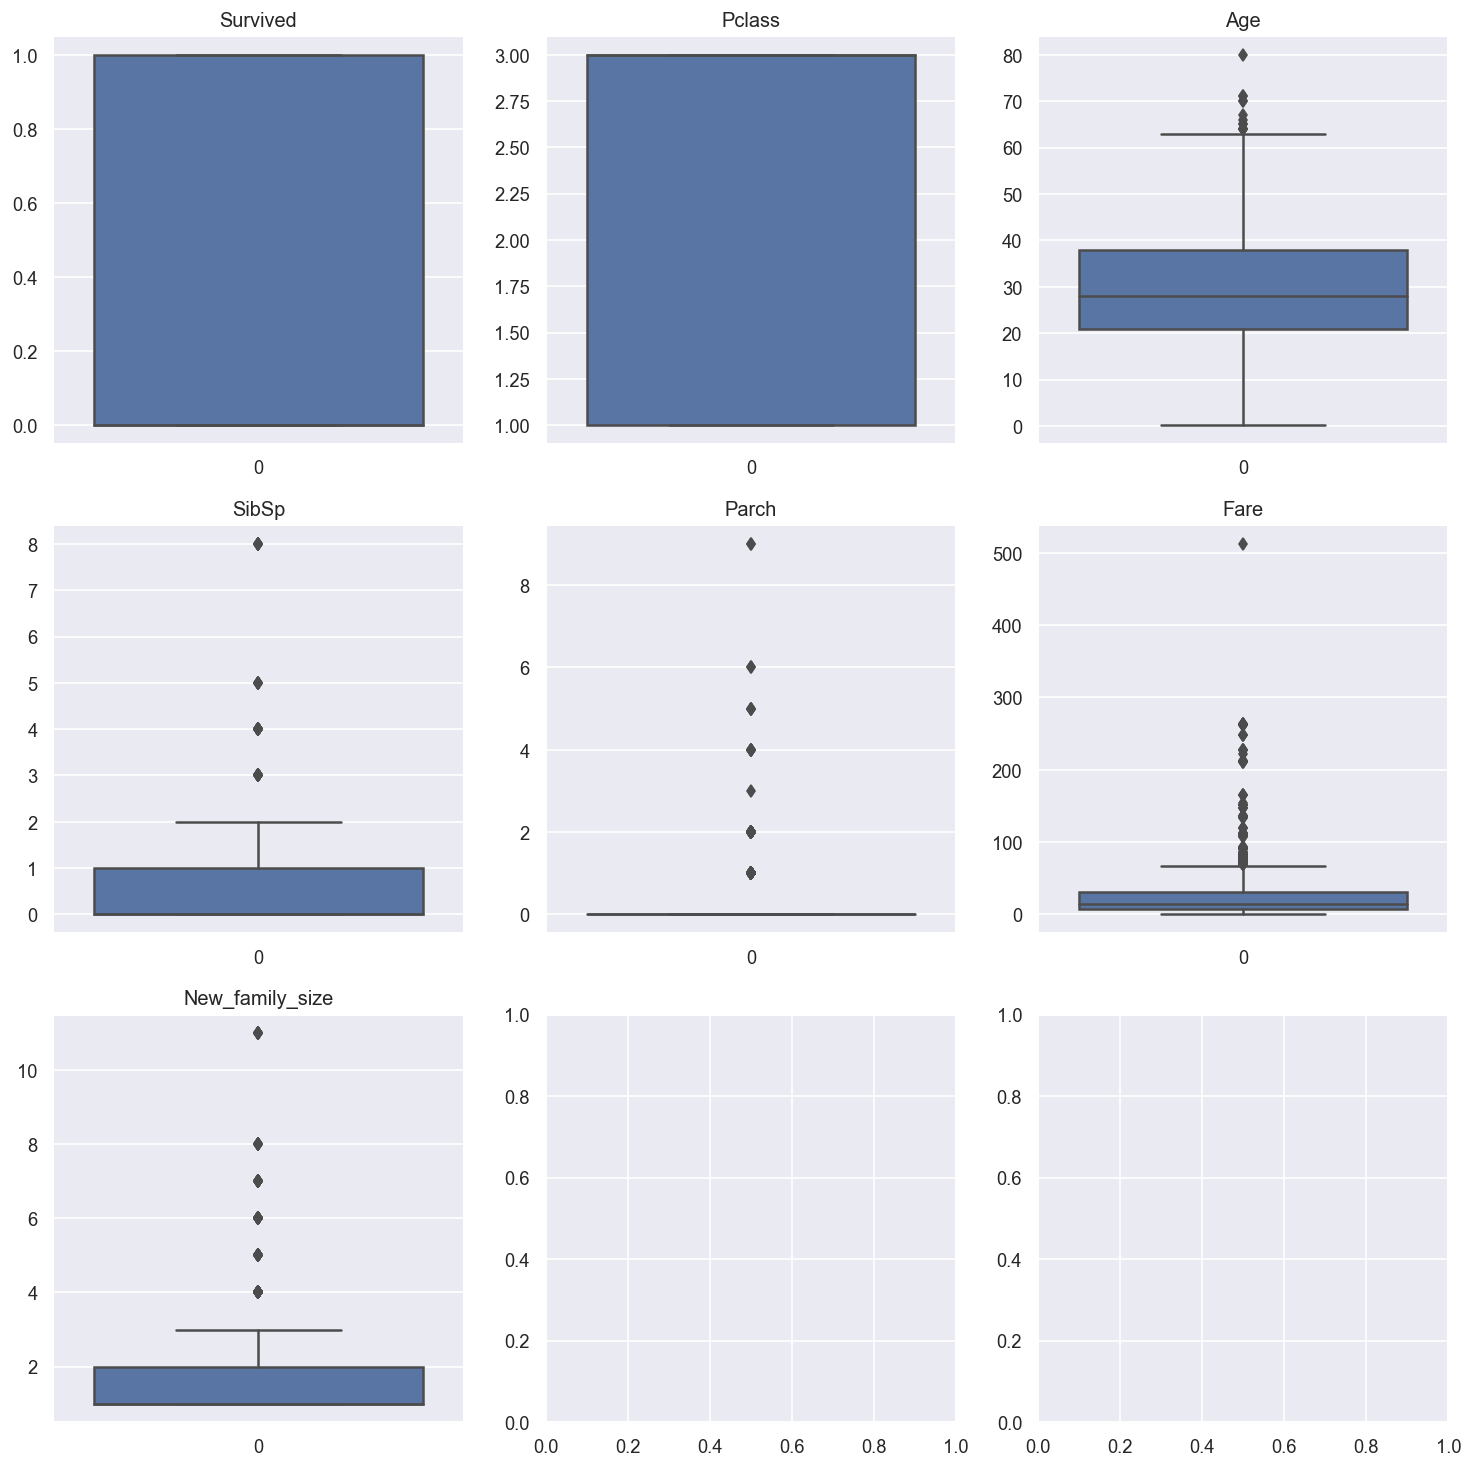

In [52]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

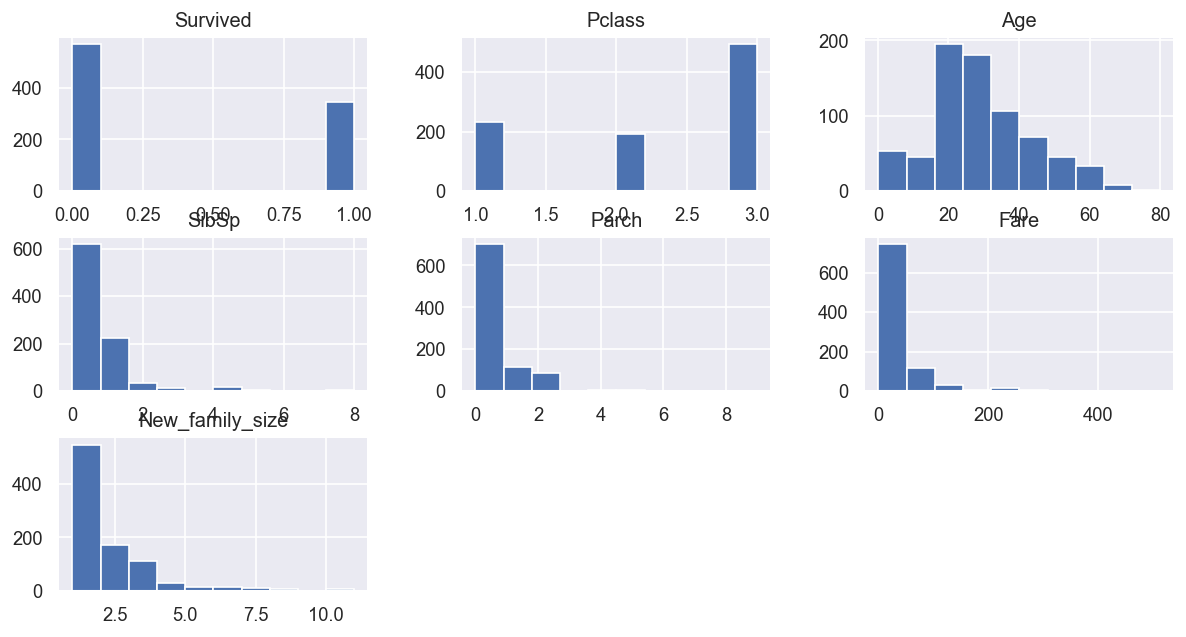

In [53]:
df.hist();

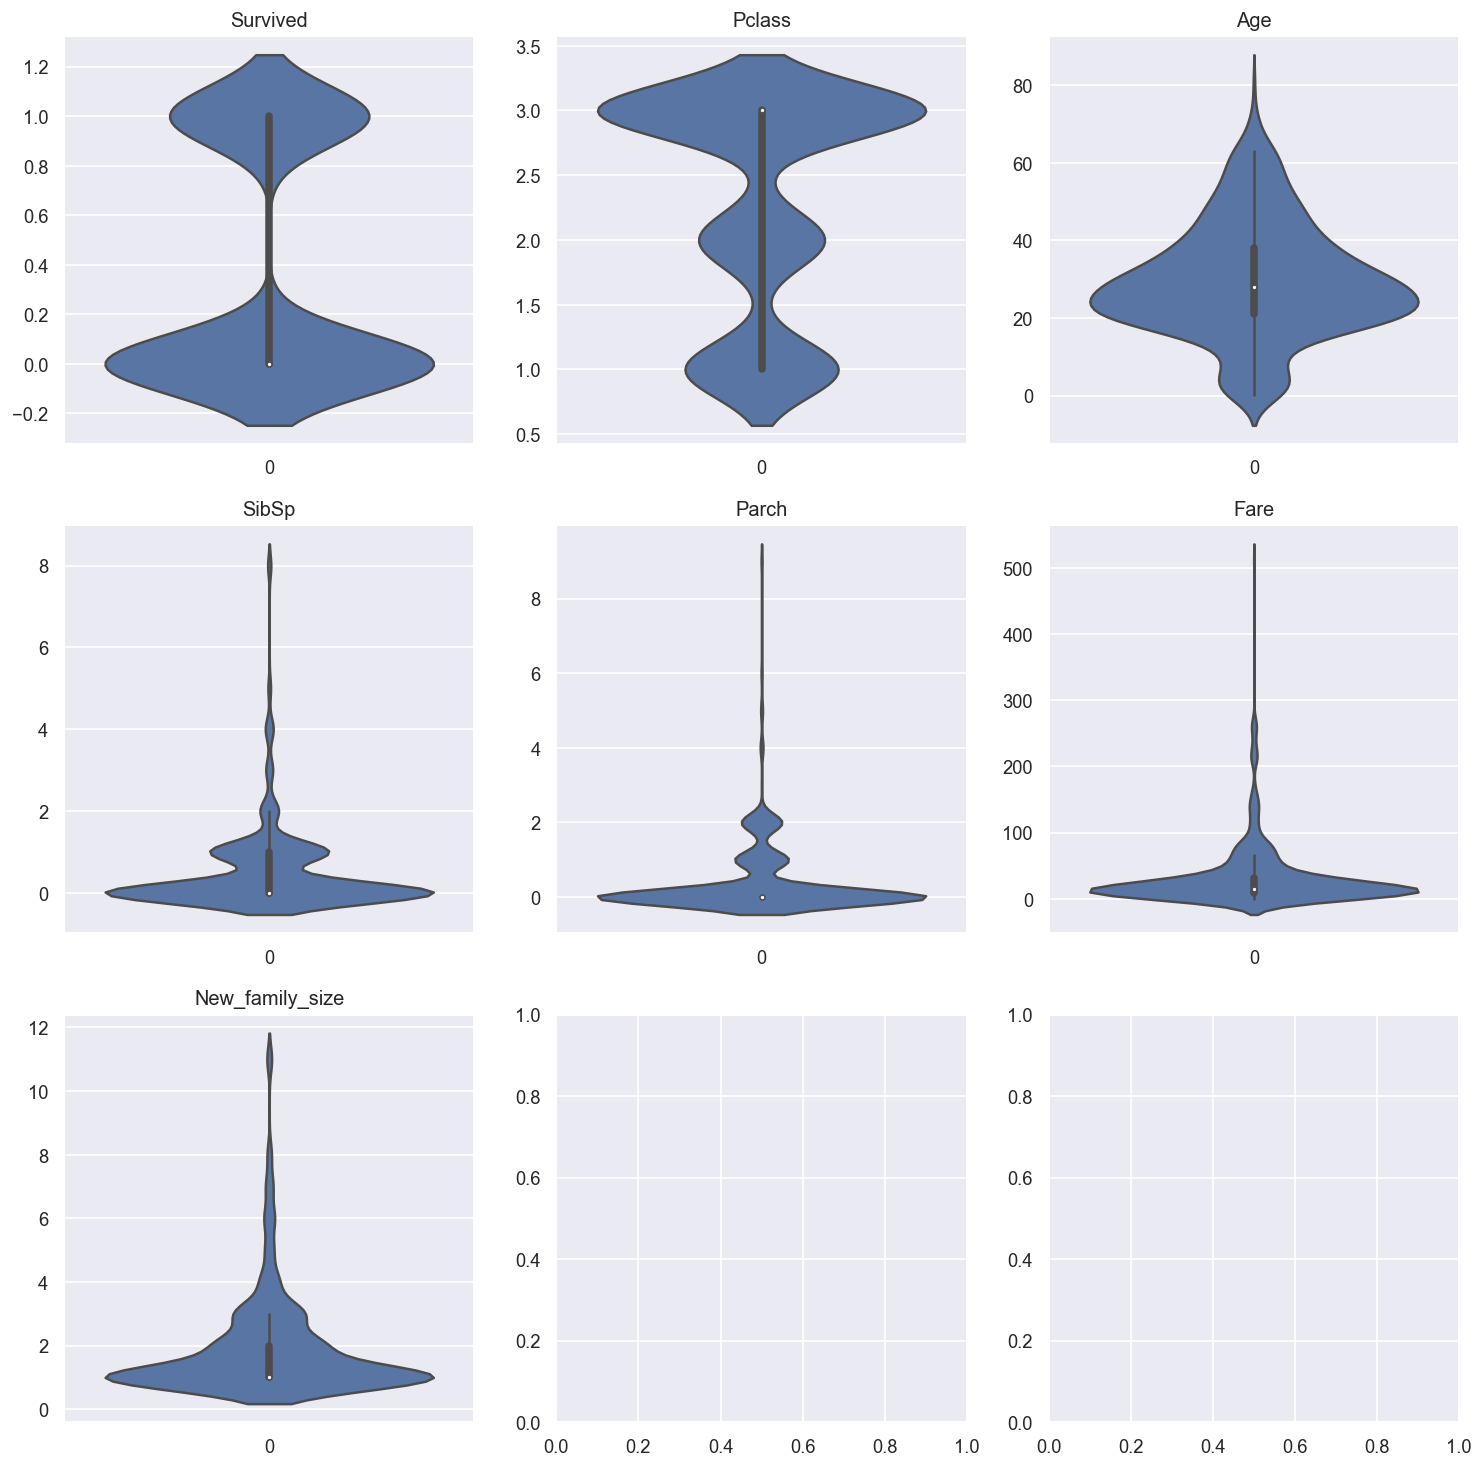

In [54]:
import math
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,15))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.violinplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

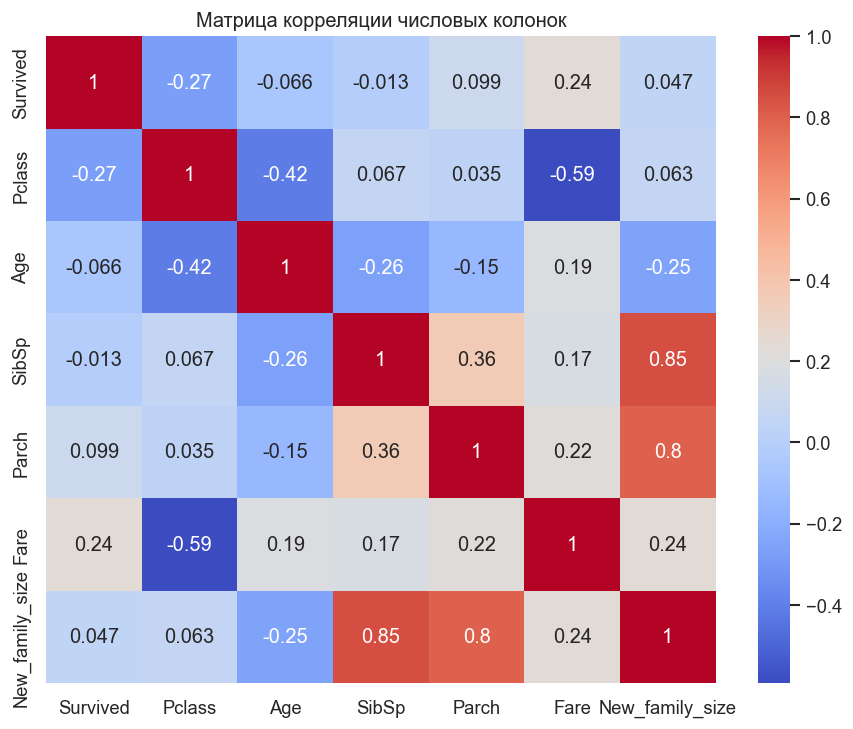

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# добавляем заголовок
plt.title('Матрица корреляции числовых колонок')

# отображаем график
plt.show()

In [67]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Уникальные элементы колонки {col}: {unique_vals}")

Уникальные элементы колонки Survived: [0 1]
Уникальные элементы колонки Pclass: [1 3 2]
Уникальные элементы колонки Sex: ['female' 'male']
Уникальные элементы колонки Age: [50.     nan  8.   51.   40.   24.   27.   23.   30.   15.   43.   21.
 39.   33.    2.   34.   20.   36.   41.   38.   26.   18.   29.   14.
 57.   16.    4.   71.   47.   44.   35.    3.   25.   54.   14.5  17.
 52.   40.5  42.   19.   22.   32.    5.   31.   28.   12.    1.   46.
 45.5   9.   49.   23.5  45.   37.    0.67 56.   48.   59.   62.   55.
  7.   10.   64.   38.5  18.5  32.5  34.5  53.   80.    0.17 61.   63.
 60.    6.    0.75 65.   24.5  70.   13.   26.5  11.    0.83 28.5  30.5
 67.   58.   66.   20.5  22.5  11.5  55.5 ]
Уникальные элементы колонки SibSp: [0 1 3 5 4 2 8]
Уникальные элементы колонки Parch: [0 1 6 2 4 5 9 3]
Уникальные элементы колонки Fare: [ 28.7125   7.75    26.      46.9      7.775    7.55     6.975   82.2667
   6.8583  13.       7.225   55.4417  77.2875  21.      11.5     29.7
  39.

## Необязательные действия по созданию дополнительных колонок

#### Создадим колонку New_title, которая содержит префиксы к имени наших граждан. И как мы увидим, мистеры не выживали с шансом 90 %, а мисис выживали с шансом 87%. Далее мы этот столбец преобразуем через onehotencoder в 15 столбцов.

In [3]:
df['New_title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
display(df['New_title'].unique())

df[["New_title", "Survived", "Age"]].groupby(["New_title"]).agg({"Survived": "mean", "Age": ["count", "mean"]})

array(['Miss', 'Mr', 'Mrs', 'Countess', 'Master', 'Mme', 'Dr', 'Rev',
       'Col', 'Major', 'Capt', 'Dona', 'Ms', 'Sir', 'Mlle'], dtype=object)

Survived   Age           
               mean count       mean
New_title                           
Capt       0.000000     1  70.000000
Col        0.333333     3  54.333333
Countess   1.000000     1  33.000000
Dona       1.000000     1  39.000000
Dr         0.200000     4  50.000000
Major      1.000000     1  52.000000
Master     0.372093    38   5.504211
Miss       0.760417   156  21.273526
Mlle       1.000000     1  24.000000
Mme        1.000000     1  24.000000
Mr         0.103647   402  32.363184
Mrs        0.876812   121  36.380165
Ms         1.000000     1  28.000000
Rev        0.000000     6  43.500000
Sir        1.000000     1  49.000000

In [4]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_title
0,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,Miss
1,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q,Mr
2,1,2,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,NaN,S,Miss
3,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S,Mr
4,0,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,3,"Midtsjo, Mr. Karl Albert",male,21.0,0,0,345501,7.7750,NaN,S,Mr
912,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S,Mr
913,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Mr
914,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Mr


#### Парсим билеты

In [5]:
df.Ticket.unique()

def process_ticket(ticket):
    if ticket.isnumeric():
        return "Default"
    else:
        parts = ticket.split()
        for i in range(len(parts)-1):
            if parts[i+1].isnumeric() and parts[i][-1] == " ":
                return parts[i]
        return parts[0]
    
df["Ticket"] = df["Ticket"].map(process_ticket)

In [6]:
df[["Ticket", "Survived", "Age"]].groupby(["Ticket"]).agg({"Survived": "mean", "Age": ["count", "mean"]}).T

Ticket           A.  A./5.   A.5.    A/4  A/4.        A/5       A/5.  A/S  \
Survived mean   1.0    0.0   0.00   0.25   0.0   0.166667   0.000000  0.0   
Age      count  0.0    2.0   2.00   4.00   2.0   4.000000   6.000000  0.0   
         mean   NaN   27.0  42.75  21.00  18.5  24.125000  33.333333  NaN   

Ticket          AQ/4          C  ...  SOTON/O2  SOTON/OQ  STON/O  STON/O2.  \
Survived mean    0.0   0.285714  ...       0.0       0.0     0.5      0.75   
Age      count   0.0   7.000000  ...       3.0       2.0    10.0      4.00   
         mean    NaN  26.857143  ...      27.0      23.0    31.6     25.75   

Ticket          STON/OQ.  SW/PP      W./C.  W.E.P.   W/C  WE/P  
Survived mean        0.0    1.0   0.125000     1.0   0.0   0.0  
Age      count       1.0    1.0   6.000000     1.0   1.0   1.0  
         mean       32.0   19.0  23.333333    47.0  30.0  70.0  

[3 rows x 43 columns]

In [7]:
df = df.drop(['Name'],axis=1)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_title
0,0,1,female,50.0,0,0,PC,28.7125,C49,C,Miss
1,0,3,male,NaN,0,0,Default,7.7500,NaN,Q,Mr
2,1,2,female,8.0,1,1,Default,26.0000,NaN,S,Miss
3,0,3,male,51.0,0,0,Default,7.7500,NaN,S,Mr
4,0,3,male,40.0,1,6,CA,46.9000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
911,0,3,male,21.0,0,0,Default,7.7750,NaN,S,Mr
912,0,3,male,NaN,0,0,Default,14.5000,NaN,S,Mr
913,0,3,male,25.0,0,0,SOTON/O.Q.,7.0500,NaN,S,Mr
914,1,3,male,26.0,0,0,Default,18.7875,NaN,C,Mr


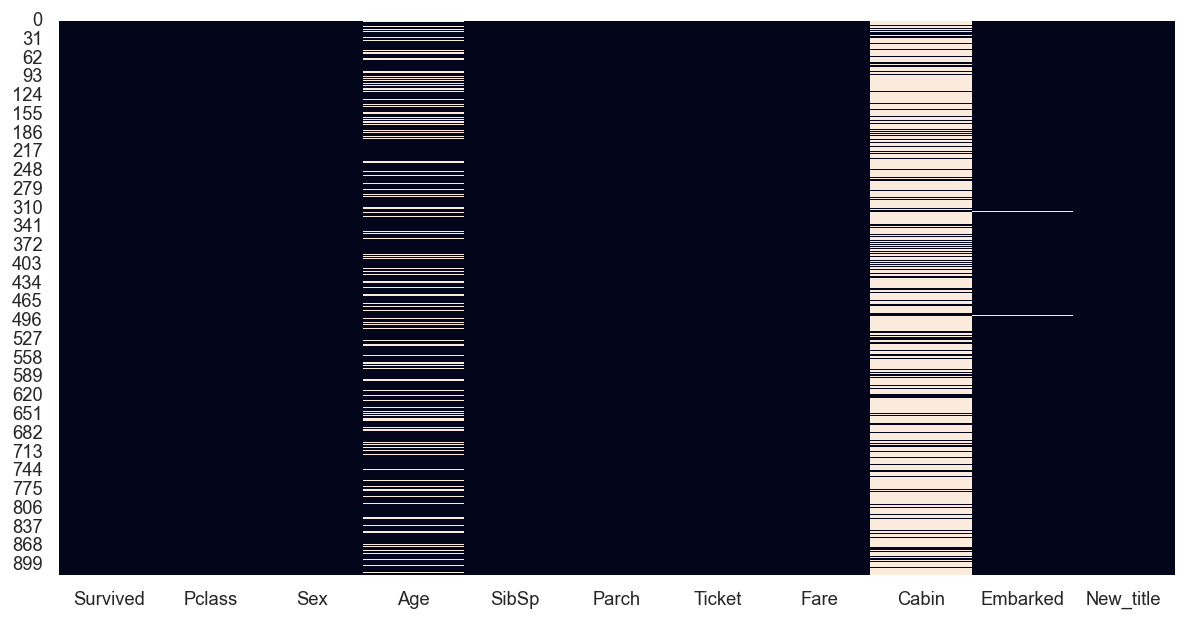

In [9]:
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 6)})
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Переименовываем кабины по первой букве

In [10]:
df['Cabin'] = df['Cabin'].fillna('Missing')
df['Cabin'] = [col.strip()[0] for col in df['Cabin']]
df['Cabin'].unique()

array(['C', 'M', 'B', 'D', 'A', 'F', 'E', 'G'], dtype=object)

In [11]:
df[df.Embarked.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_title
315,1,1,female,62.0,0,0,Default,80.0,B,NaN,Mrs
487,1,1,female,38.0,0,0,Default,80.0,B,NaN,Miss


### Столбец количество людей в семье. Ведь семья это главное

In [12]:
df["New_family_size"] = df["SibSp"] + df["Parch"] + 1

#### Дропаем столбцы которые делали целый день, потому что они особо не улучшают модель, а только лишь нагружают

In [13]:
df = df.drop(['Ticket','New_title'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_family_size
0,0,1,female,50.0,0,0,28.7125,C,C,1
1,0,3,male,NaN,0,0,7.7500,M,Q,1
2,1,2,female,8.0,1,1,26.0000,M,S,3
3,0,3,male,51.0,0,0,7.7500,M,S,1
4,0,3,male,40.0,1,6,46.9000,M,S,8
...,...,...,...,...,...,...,...,...,...,...
911,0,3,male,21.0,0,0,7.7750,M,S,1
912,0,3,male,NaN,0,0,14.5000,M,S,1
913,0,3,male,25.0,0,0,7.0500,M,S,1
914,1,3,male,26.0,0,0,18.7875,M,C,1


In [14]:
X = df.drop(['Survived'], axis = 1)
y = df.Survived

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [16]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_family_size
584,1,female,25.0,1,2,151.5500,C,S,4
143,3,male,26.0,0,0,8.0500,M,S,1
344,3,male,50.0,1,0,14.5000,M,S,2
747,2,male,19.0,0,0,10.5000,M,S,1
452,3,female,NaN,0,0,7.7500,M,Q,1
...,...,...,...,...,...,...,...,...,...
821,3,male,NaN,0,0,56.4958,M,S,1
74,1,female,30.0,0,0,164.8667,C,S,1
876,3,male,39.0,0,2,7.2292,M,C,3
211,1,male,64.0,0,0,26.0000,M,S,1


In [17]:
# from sklearn.compose import make_column_transformer
# from sklearn.compose import make_column_selector

# sex_transformer = Pipeline(steps=[
#     ("sex",OrdinalEncoder())
# ])

# imputer_transformer = Pipeline(steps=[
#     ('imputer', KNNImputer(n_neighbors = 5)),
#     ('scaler', MinMaxScaler())
# ])

# imput_and_OHE = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehotencoder', OneHotEncoder())
# ])


# CT = ColumnTransformer([
#         ("sex", sex_transformer, ['Sex']),
#         ('imputer_Age', imputer_transformer, ['Age']),
#         ('imputer_OHE_Embarked', imput_and_OHE, ['Embarked']),
#         ('MinMax', MinMaxScaler(), ['Pclass', 'Fare','New_family_size']),
#         ('MX', MinMaxScaler(), ['SibSp','Parch']),
#         ('Cauta', OneHotEncoder(), make_column_selector(pattern= 'Cabin', dtype_include=object))
    
# #         ('New_title', OneHotEncoder(handle_unknown='ignore'), make_column_selector(pattern= 'New_title', dtype_include=object)),
# #         ('Ticket', OneHotEncoder(handle_unknown='ignore'), make_column_selector(pattern= 'Ticket', dtype_include=object))
#     ],  remainder = 'passthrough')


# display(CT)
# res_ct = CT.fit_transform(X_train)



In [18]:
axis_features = ['Age','Pclass', 'Fare','New_family_size','SibSp','Parch'] # сюда вписываются числовые колонки
categorical_features = ['Embarked', 'Cabin'] # сюда вписываются категориальные колонки для OneHotEncoder
categorical_ordinal = ['Sex'] # сюда вписываются категориальные в перевод в числа без приориотизации (например, бинарные 0 1)
# categorical_with_order = [] # сюда вписываются категориальная колонка для перевода в числа с приоритизацией порядка (от 0 до N)

# здесь идет преобразование числовых
imputer_for_nums = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5, missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

imputer_for_categorical_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
    
])

imputer_for_categorical_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder())
    
])

order_for_cat = [{
    'col':'НАЗВАНИЕ КОЛОНКИ',
    'mapping':{'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
    }]

imputer_for_categorical_with_order = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat)),
    ('scaler', MinMaxScaler())
    ])



CT = ColumnTransformer([
    
        ("imputer_for_nums", imputer_for_nums, axis_features), # здесь идет преобразование числовых
        ("imputer_for_categorical_OHE", imputer_for_categorical_OHE, categorical_features), ## здесь onehotencoder (страны, города и тд)
        ("imputer_for_categorical_ordinal", imputer_for_categorical_ordinal, categorical_ordinal), # преобразование категорий в бинарные 0 1
#         ("imputer_for_categorical_with_order", imputer_for_categorical_with_order, categorical_with_order) # преобразование категорий в приоритизированный массив от 0 до N

             ], 
    
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_for_nums',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Pclass', 'Fare', 'New_family_size',
                                  'SibSp', 'Parch']),
                                ('imputer_for_categorical_OHE',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Embarked', 'Cabin']),
                                ('imputer_for_categorical_ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', OrdinalEncoder())]),
                                 ['Sex'])])

In [19]:
X_train_new = pd.DataFrame(res_ct, columns=CT.get_feature_names_out())


display(X_train_new.T)

X_test_new = pd.DataFrame(CT.transform(X_test), columns=CT.get_feature_names_out())


display(X_test_new.T)

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
imputer_for_nums__Age,0.306694,0.319299,0.621833,0.231060,0.485693,0.483172,0.485693,0.634438,0.785705,0.231060,...,0.326862,0.268877,0.231060,0.483172,0.445355,0.470566,0.369721,0.483172,0.798311,0.407538
imputer_for_nums__Pclass,0.000000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,0.000000,...,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
imputer_for_nums__Fare,0.295806,0.015713,0.028302,0.020495,0.015127,0.050749,0.015127,0.024447,0.018714,0.051302,...,0.015184,0.040989,0.031425,0.216430,0.153905,0.110272,0.321798,0.014110,0.050749,0.028221
imputer_for_nums__New_family_size,0.300000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.100000,0.200000,0.100000,0.000000,0.000000,0.200000,0.000000,0.100000
imputer_for_nums__SibSp,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.125000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000
imputer_for_nums__Parch,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000
imputer_for_categorical_OHE__Embarked_C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
imputer_for_categorical_OHE__Embarked_Q,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__Embarked_S,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
imputer_for_categorical_OHE__Cabin_A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,228
imputer_for_nums__Age,0.306694,0.268877,0.306694,0.760494,0.407538,0.218455,0.659650,0.195765,0.256271,-0.006303,...,0.218455,0.369721,0.357116,0.016765,0.432749,0.362158,0.079793,0.218455,0.558805,0.445355
imputer_for_nums__Pclass,0.000000,1.000000,1.000000,0.500000,0.000000,1.000000,0.000000,1.000000,0.500000,1.000000,...,0.500000,0.000000,0.500000,0.500000,0.000000,1.000000,0.500000,0.000000,0.000000,1.000000
imputer_for_nums__Fare,0.108215,0.014102,0.014932,0.024106,0.168837,0.015176,0.159777,0.049708,0.022447,0.040160,...,0.143462,0.112720,0.050749,0.044893,0.162932,0.028302,0.051237,0.117112,0.102579,0.014631
imputer_for_nums__New_family_size,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.400000,0.000000,0.300000,...,0.000000,0.100000,0.100000,0.200000,0.100000,0.000000,0.200000,0.100000,0.100000,0.000000
imputer_for_nums__SibSp,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.375000,0.000000,0.125000,...,0.000000,0.125000,0.125000,0.125000,0.125000,0.000000,0.000000,0.125000,0.125000,0.000000
imputer_for_nums__Parch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.222222,...,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__Embarked_C,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__Embarked_Q,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
imputer_for_categorical_OHE__Embarked_S,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
imputer_for_categorical_OHE__Cabin_A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
y_train_new = y_train.values

## Читерский способ поиска лучшей модели. Его и нужно использовать на КТ, потому что Шилин не запрещал

In [21]:
from pycaret.classification import *
setup(X_train_new,target=y_train_new,session_id=42,train_size= 0.8)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(687, 19)"
4,Transformed data shape,"(687, 19)"
5,Transformed train set shape,"(549, 19)"
6,Transformed test set shape,"(138, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8634,0.9021,0.7936,0.8402,0.8135,0.7062,0.7096,0.6250
lr,Logistic Regression,0.8597,0.9055,0.7886,0.8359,0.8084,0.6982,0.7021,1.3710
ridge,Ridge Classifier,0.8597,0.0000,0.7888,0.8350,0.8079,0.6980,0.7020,0.6250
catboost,CatBoost Classifier,0.8579,0.9065,0.7788,0.8385,0.8027,0.6925,0.6983,0.7330
gbc,Gradient Boosting Classifier,0.8543,0.9055,0.7695,0.8402,0.7967,0.6843,0.6920,0.6490
rf,Random Forest Classifier,0.8507,0.8973,0.7600,0.8396,0.7925,0.6768,0.6838,0.6540
ada,Ada Boost Classifier,0.8470,0.8840,0.7690,0.8204,0.7888,0.6697,0.6755,0.6430
lightgbm,Light Gradient Boosting Machine,0.8434,0.9018,0.7743,0.8101,0.7860,0.6633,0.6697,0.7450
xgboost,Extreme Gradient Boosting,0.8398,0.8999,0.7602,0.8161,0.7805,0.6552,0.6629,0.6980
knn,K Neighbors Classifier,0.8379,0.8820,0.7602,0.8061,0.7787,0.6515,0.6559,0.6990


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

### Сделаем box plots по основным моделям

In [21]:
cross_val = StratifiedKFold(n_splits=5, shuffle=True)
clf_list = [KNeighborsClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier(), DecisionTreeClassifier()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

[array([0.84782609, 0.81884058, 0.83211679, 0.75912409, 0.79562044]),
 array([0.83333333, 0.83333333, 0.83941606, 0.83211679, 0.83211679]),
 array([0.84057971, 0.82608696, 0.87591241, 0.86131387, 0.81751825]),
 array([0.84057971, 0.80434783, 0.81021898, 0.77372263, 0.80291971]),
 array([0.80434783, 0.79710145, 0.81751825, 0.78832117, 0.7810219 ])]

In [22]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),ExtraTreesClassifier(),DecisionTreeClassifier()
0,0.847826,0.833333,0.840580,0.840580,0.804348
1,0.818841,0.833333,0.826087,0.804348,0.797101
2,0.832117,0.839416,0.875912,0.810219,0.817518
3,0.759124,0.832117,0.861314,0.773723,0.788321
4,0.795620,0.832117,0.817518,0.802920,0.781022


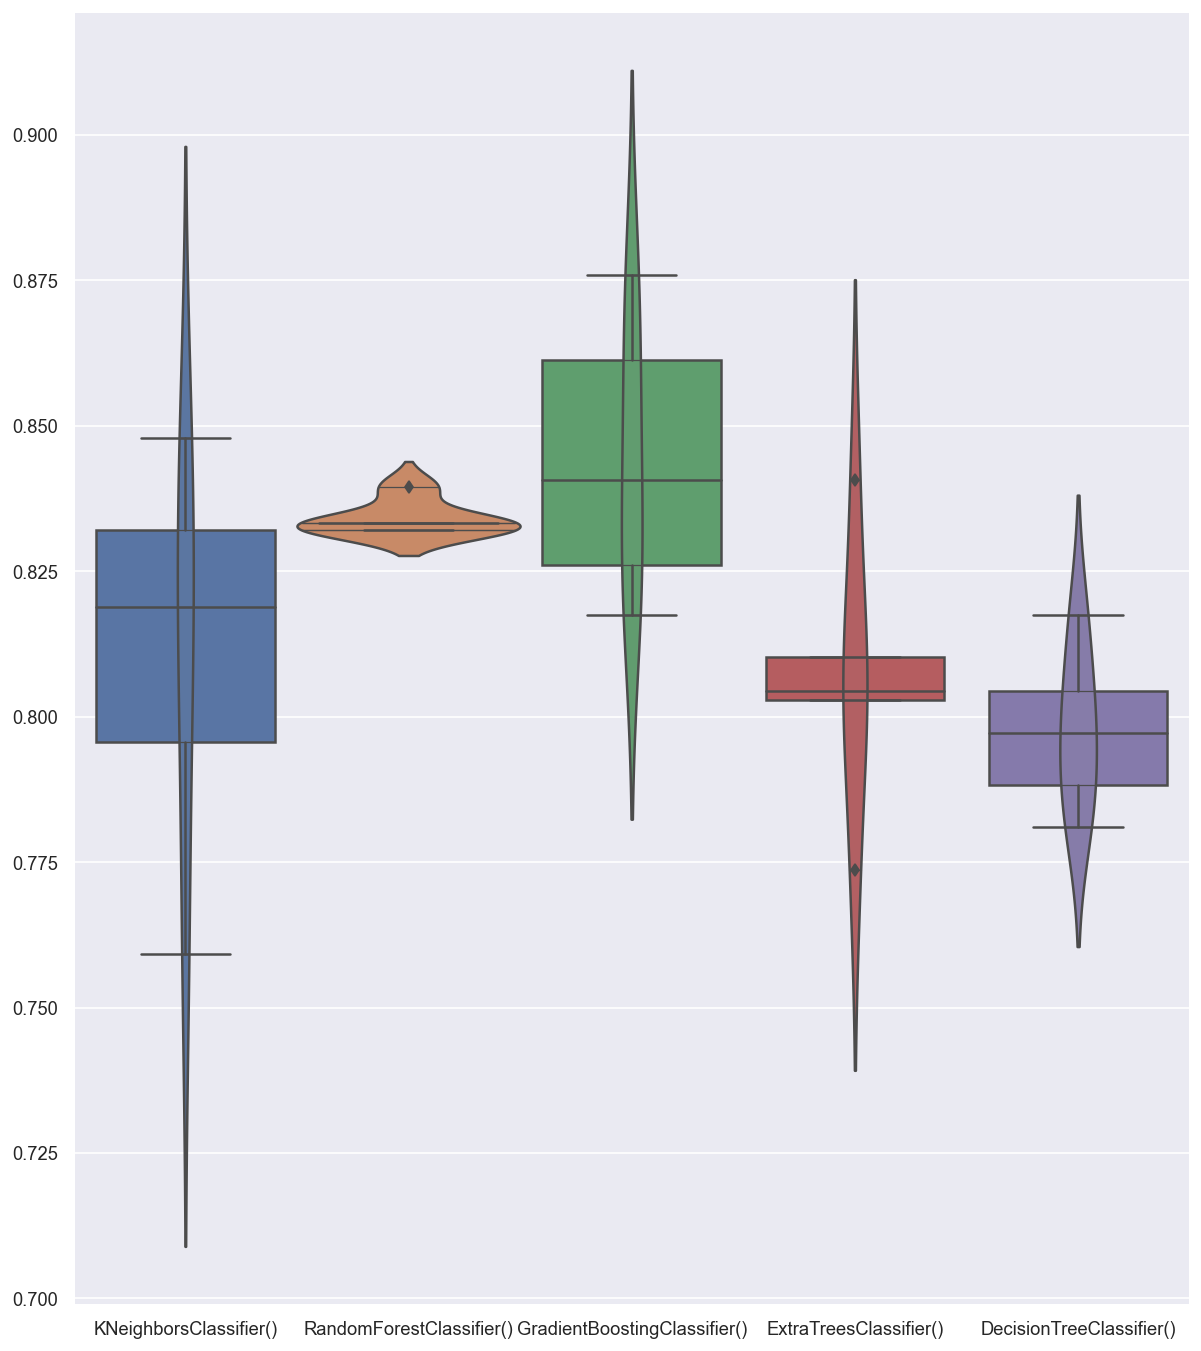

In [23]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [24]:
cross_val = StratifiedKFold(n_splits=5, shuffle=True)
clf_list = [SVC(), LogisticRegression(), RidgeClassifier(), LinearDiscriminantAnalysis()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

[array([0.86231884, 0.81884058, 0.86861314, 0.83941606, 0.84671533]),
 array([0.85507246, 0.82608696, 0.87591241, 0.86131387, 0.84671533]),
 array([0.86231884, 0.83333333, 0.87591241, 0.8540146 , 0.84671533]),
 array([0.85507246, 0.83333333, 0.87591241, 0.8540146 , 0.84671533])]

In [25]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = ['SVC','LogisticRegression', 'RidgeClassifier','LinearDiscriminantAnalysis'] 
#                  [str(i) for i in clf_list]
cv_df

,SVC,LogisticRegression,RidgeClassifier,LinearDiscriminantAnalysis
0,0.862319,0.855072,0.862319,0.855072
1,0.818841,0.826087,0.833333,0.833333
2,0.868613,0.875912,0.875912,0.875912
3,0.839416,0.861314,0.854015,0.854015
4,0.846715,0.846715,0.846715,0.846715


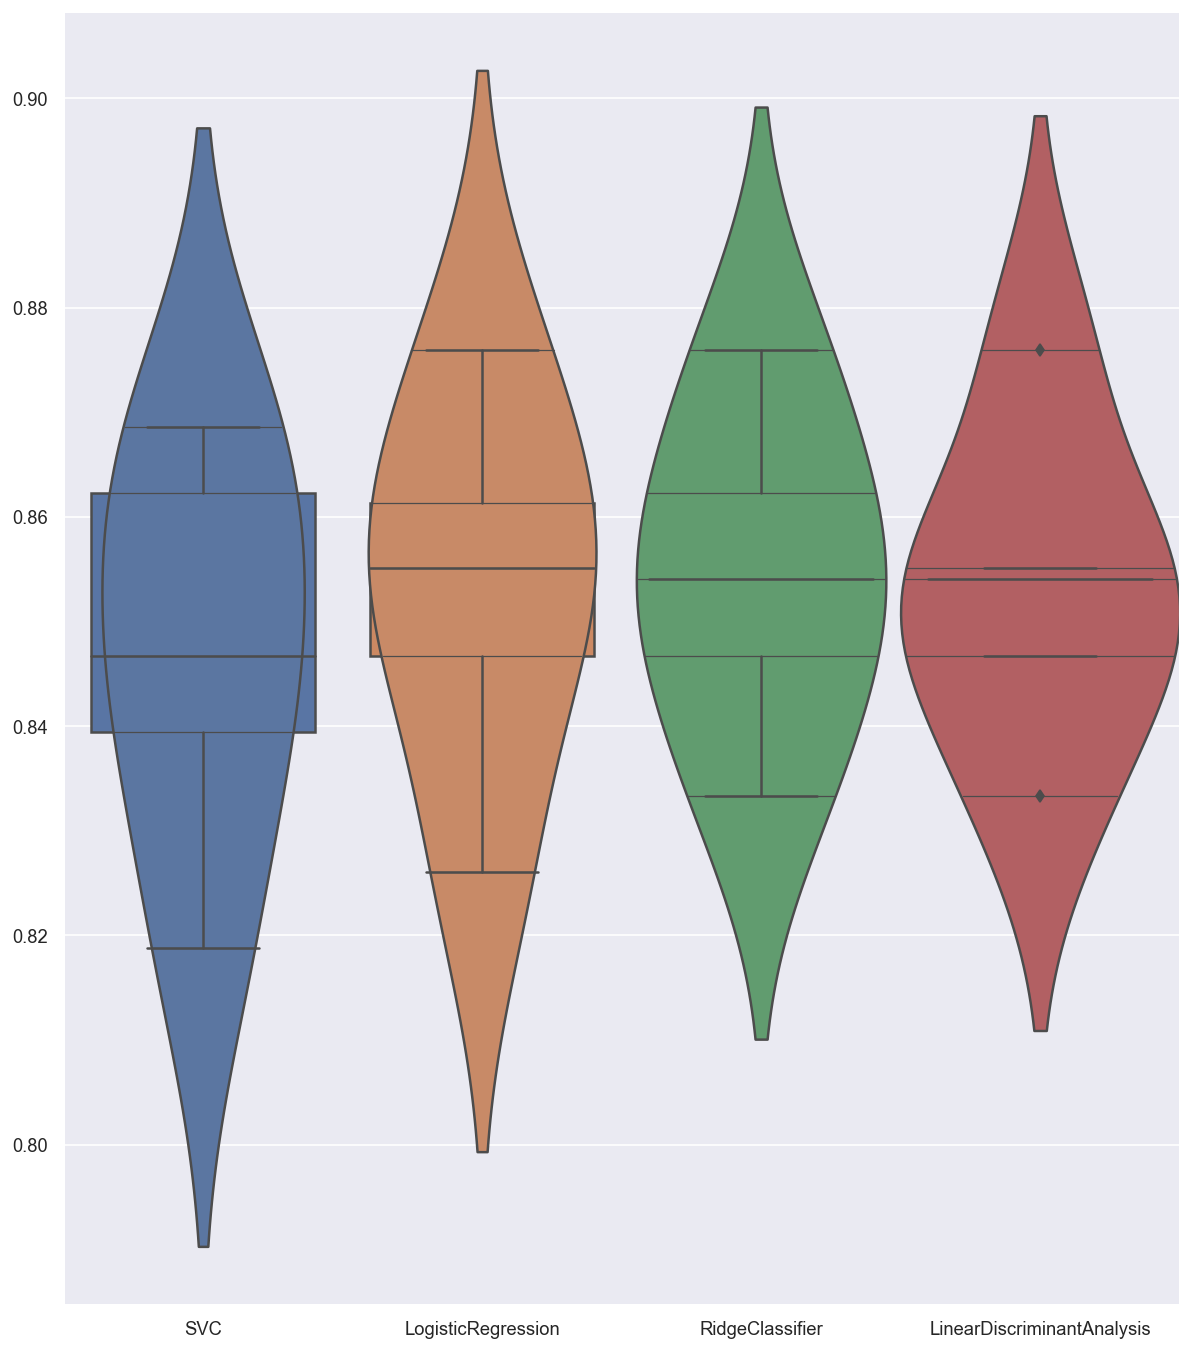

In [26]:
# Делаем самолетики без фичинга
plt.figure(figsize=(12, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

### Классификация с помощью опорных векторов.

In [29]:
pipe = Pipeline([ ('preprocessing', CT) ,
                 ('svc', SVC(kernel='rbf', C = 10, gamma = 0.1))])
pipe.fit(X_train,y_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))

0.858806404657933
0.834061135371179


<AxesSubplot: xlabel='param_classifier__gamma', ylabel='param_classifier__C'>

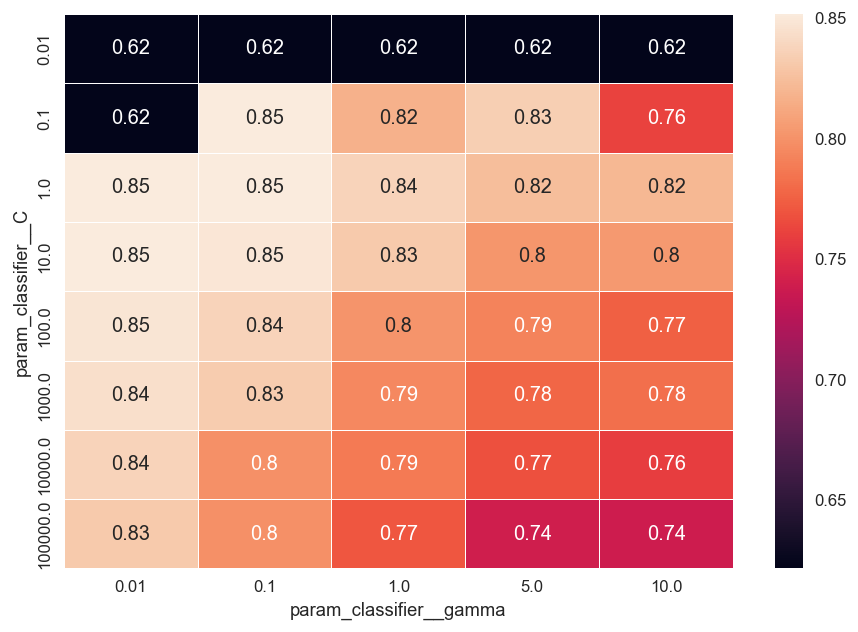

In [30]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

pipe = Pipeline([('preprocessing', CT), 
                 ('classifier', SVC())])

C=np.array([0.01,0.1,1,10,100,10**3,10**4, 10**5])
gamma=[0.01,0.1,1,5,10]


param_grid =[
    {'preprocessing': [CT], 
     'classifier': [SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]

grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)
grid.fit(X_train,y_train)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

Делаем более детальный поиск

<AxesSubplot: xlabel='param_classifier__gamma', ylabel='param_classifier__C'>

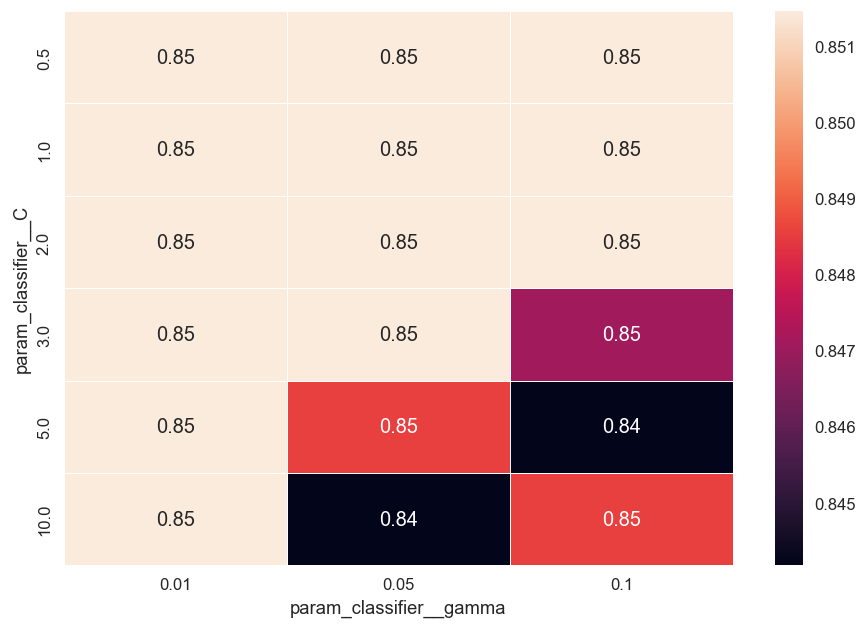

In [31]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

pipe = Pipeline([('preprocessing', CT), 
                 ('classifier', SVC(kernel = 'rbf'))])

C=np.array([0.5,1,2,3,5,10])
gamma=[0.01,0.05,0.1]


param_grid =[
    {'preprocessing': [CT], 
     'classifier': [SVC()],
     'classifier__C': C,
     'classifier__gamma': gamma
     }
]
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe, param_grid, cv=cross_val, return_train_score=True)
grid.fit(X_train,y_train)
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [32]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,0.024205,0.019204,0.018604,0.020205,0.021005,0.018604,0.022605,0.019004,0.021884,0.024406,0.021205,0.021405,0.019204,0.022005,0.020204,0.019805,0.018005,0.019604
std_fit_time,0.005232,0.00098,0.001625,0.001939,0.00245,0.00049,0.002417,0.002,0.001761,0.001357,0.002482,0.001497,0.001167,0.002684,0.001167,0.002136,0.002098,0.002417
mean_score_time,0.011003,0.008802,0.008402,0.011203,0.010002,0.009202,0.010603,0.009802,0.010803,0.011602,0.008802,0.009602,0.008402,0.009602,0.008602,0.008602,0.007802,0.008002
std_score_time,0.001674,0.000748,0.00049,0.00147,0.001414,0.0004,0.001357,0.0016,0.00098,0.001744,0.001166,0.001357,0.00102,0.0012,0.00049,0.0008,0.000748,0.000633
param_classifier,"SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c...","SVC(C=0.5, break_ties=False, cache_size=200, c..."
param_classifier__C,0.5,0.5,0.5,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,5.0,5.0,5.0,10.0,10.0,10.0
param_classifier__gamma,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.1,0.01,0.05,0.1
param_preprocessing,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass..."
params,"{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca...","{'classifier': SVC(C=0.5, break_ties=False, ca..."
split0_test_score,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.869565,0.862319,0.869565,0.862319,0.869565,0.869565,0.862319,0.869565


In [33]:
pipe = Pipeline([('preprocessing', CT), 
                 ('classifier', SVC(kernel = 'rbf', C=6, gamma = 0.1))])
pipe.fit(X_train,y_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))

0.8573508005822417
0.834061135371179


SVC показывает вполне неплохой результат

### Построим модель KNN

In [34]:
KNN = Pipeline([('preprocessing', CT),('classifier', KNeighborsClassifier())])
KNN.fit(X_train, y_train)

display(KNN.score(X_train, y_train))
display(KNN.score(X_test, y_test))

0.8806404657933042

0.8427947598253275

In [35]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', KNeighborsClassifier())])

n_neighbors  = np.arange(1,200,10)
p= [1,2,3,4,5,6,7,8,9]
weights = ['uniform'] # при желании и наличии времени, добавляем сюда штраф за дистанцию 'distance'

param_grid = [
    {'preprocessing': [CT],
    'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка


# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,...
                                                                                                            missing_values=nan,
                                                                                                            strategy='most_frequent',
                                                                                                            verbose='deprecated')),
                                                                                             ('scaler',
                                                                                              OrdinalEncoder(categories='auto',
                                                                                                             dtype=<class 'numpy.float64'>,
                                                                                                             encoded_missing_value=nan,
                                                                                                             handle_unknown='error',
                                                                                                             unknown_value=None))],
                                                                                      verbose=False),
                                                                             ['Sex'])],
                                                              verbose=False,
                                                              verbose_feature_names_out=True)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<AxesSubplot: xlabel='param_classifier__p', ylabel='param_classifier__n_neighbors'>

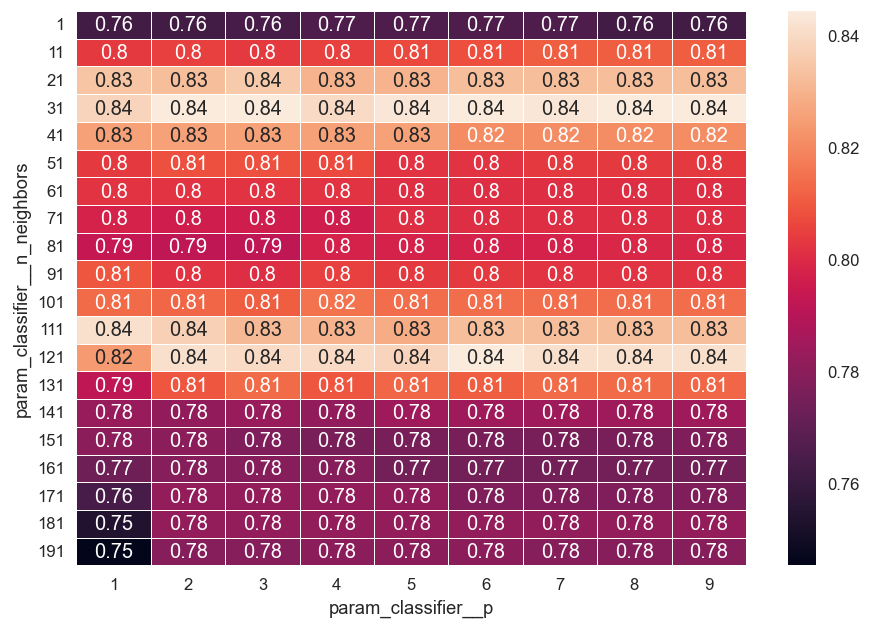

In [36]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_neighbors',columns='param_classifier__p',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [37]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,113,28,29,35,34,32,31,33,109,116,...,6,5,2,153,7,8,1,0,162,171
mean_fit_time,0.024805,0.023605,0.021205,0.024006,0.023405,0.023005,0.022205,0.020405,0.023205,0.024206,...,0.020604,0.021405,0.023005,0.020805,0.025606,0.024406,0.023005,0.022406,0.022806,0.023005
std_fit_time,0.003764,0.001625,0.001167,0.005217,0.004318,0.002829,0.0016,0.00102,0.004263,0.003311,...,0.001625,0.002578,0.002898,0.001167,0.005202,0.001744,0.001674,0.001356,0.00204,0.001096
mean_score_time,0.094821,0.053212,0.069416,0.077217,0.083019,0.079418,0.071016,0.068615,0.053412,0.076617,...,0.074217,0.067814,0.161836,0.053812,0.081418,0.073417,0.056412,0.069015,0.054612,0.054812
std_score_time,0.019757,0.008842,0.002333,0.015513,0.017056,0.013188,0.004148,0.001357,0.003073,0.005464,...,0.012009,0.003061,0.072439,0.00204,0.022822,0.006408,0.011149,0.012136,0.003556,0.000749
param_classifier,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...",...,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si..."
param_classifier__n_neighbors,121,31,31,31,31,31,31,31,121,121,...,1,1,1,171,1,1,1,1,181,191
param_classifier__p,6,2,3,9,8,6,5,7,2,9,...,7,6,3,1,8,9,2,1,1,1
param_classifier__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...",...,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass..."
params,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier':

In [38]:
KNN = Pipeline([('preprocessing', CT),('classifier', KNeighborsClassifier(n_neighbors = 41 , p = 4))])
KNN.fit(X_train, y_train)

display(KNN.score(X_train, y_train))
display(KNN.score(X_test, y_test))

0.851528384279476

0.851528384279476

### РандомФоресту посвящен всего один блок :)

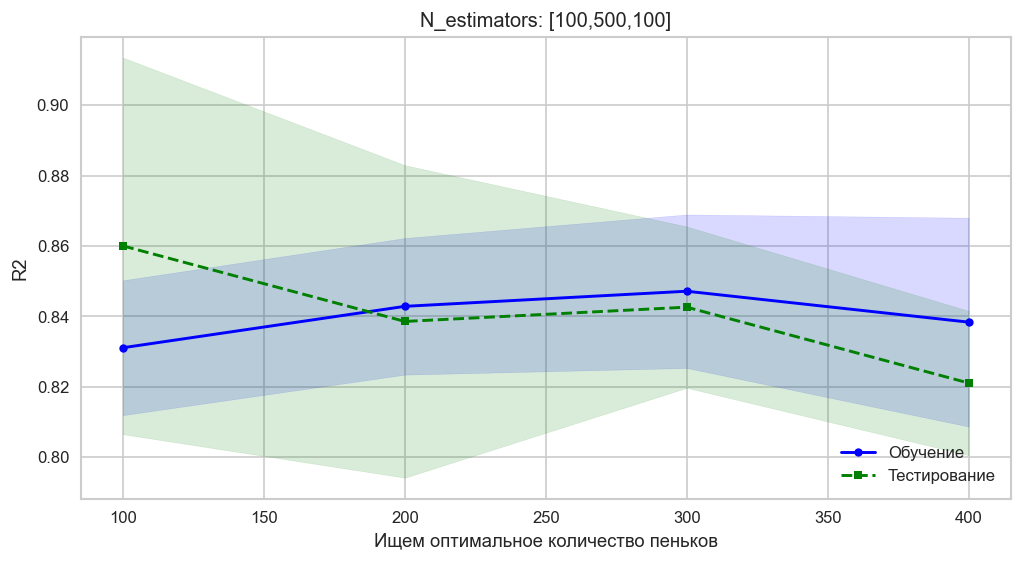

In [39]:
# Подбираем кол-во estimator , чем больше тем лучше, но слишком много тоже не нужно, поищем когда уменьшится улучшение модели
cross_val = StratifiedKFold(n_splits=5, shuffle=True)
n_estimators = np.arange(100,500,100)
scores_train = []
scores_test = []
for i in n_estimators:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestClassifier(n_estimators=i))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=cross_val))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=cross_val))
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('N_estimators: [100,500,100]')
plt.plot(n_estimators, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(n_estimators, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(n_estimators, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(n_estimators, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество пеньков')
plt.ylabel('R2')
plt.legend(loc='lower right')
plt.show()

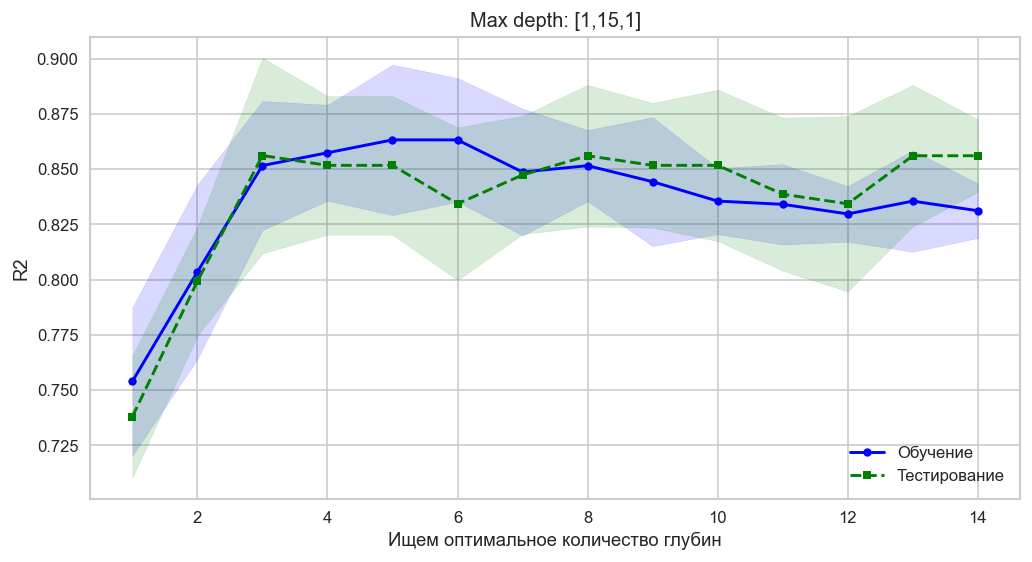

In [40]:
# max_depth

max_depth = np.arange(1,15,1)
scores_train = []
scores_test = []
for i in max_depth:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestClassifier(n_estimators=100, max_depth = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5)))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5)))
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max depth: [1,15,1]')
plt.plot(max_depth, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_depth, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_depth, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_depth, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество глубин')
plt.ylabel('R2')
plt.legend(loc='lower right')
plt.show()

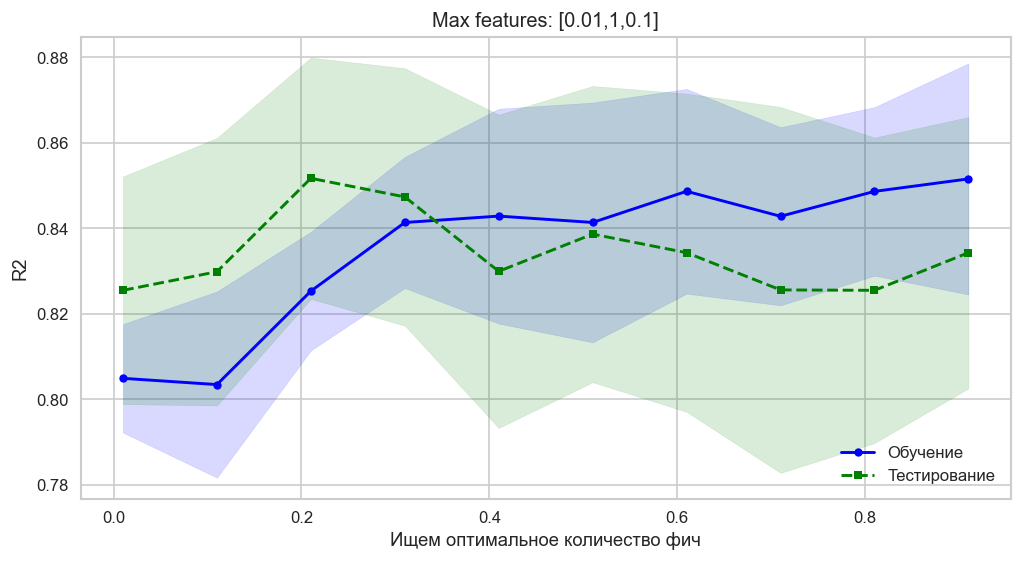

In [41]:
# Подбираем количество фич, используемое для обучения одного пенька

max_features = np.arange(0.01,1,0.1)
scores_train = []
scores_test = []
for i in max_features:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestClassifier(n_estimators=100, max_features = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5)))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5)))
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max features: [0.01,1,0.1]')
plt.plot(max_features, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_features, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_features, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_features, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем оптимальное количество фич')
plt.ylabel('R2')
plt.legend(loc='lower right')
plt.show()

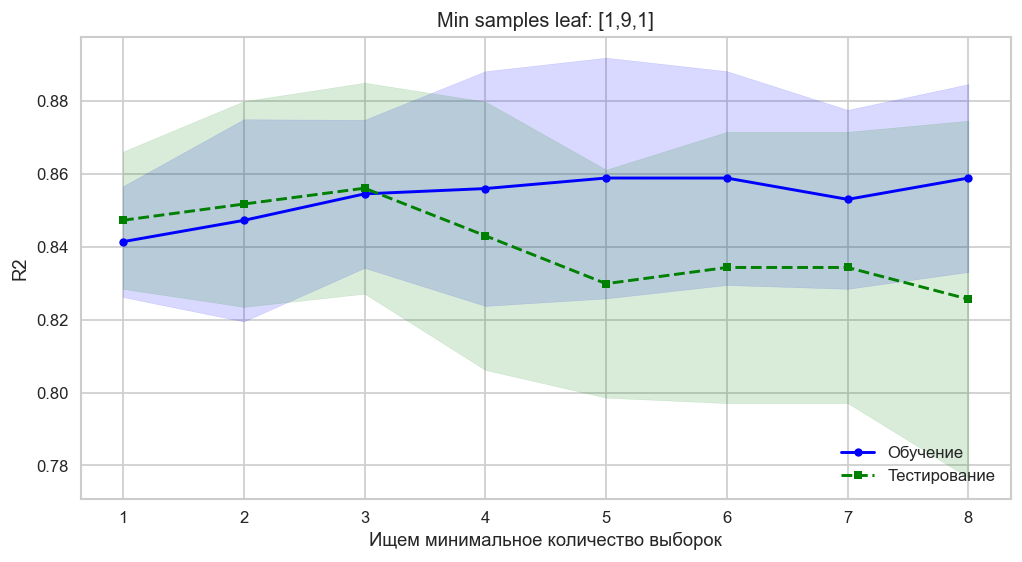

In [42]:
#Подбираем минимальное количество выборок для узла min_samples_leaf 

min_samples_leaf = np.arange(1,9,1)
scores_train = []
scores_test = []
for i in min_samples_leaf:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestClassifier(n_estimators=100, min_samples_leaf = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5)))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5)))
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Min samples leaf: [1,9,1]')
plt.plot(min_samples_leaf, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(min_samples_leaf, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(min_samples_leaf, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(min_samples_leaf, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем минимальное количество выборок')
plt.ylabel('R2')
plt.legend(loc='lower right')
plt.show()

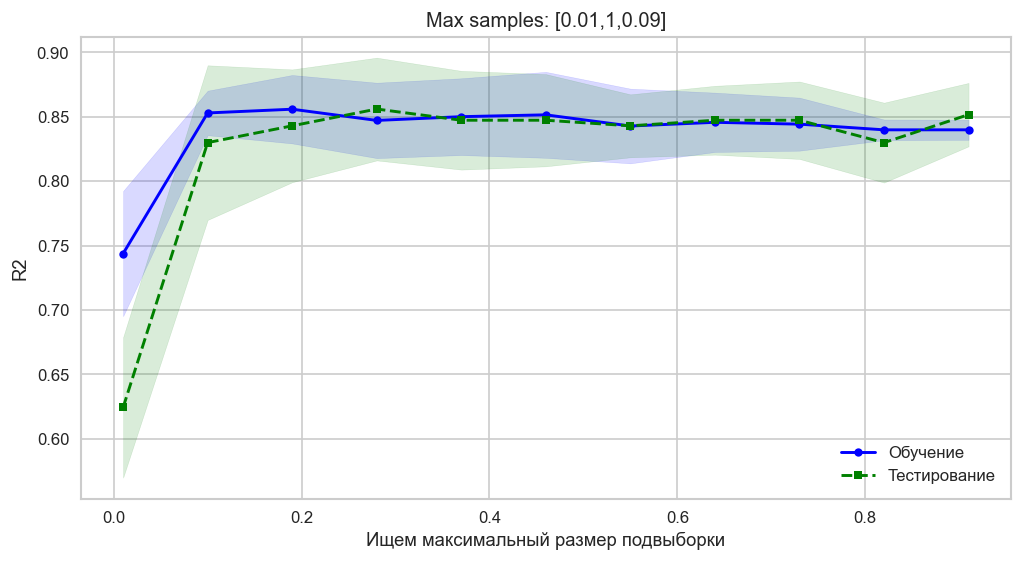

In [43]:
# Подбираем кол-во максимальной выборки max_samples
max_samples = np.arange(0.01,1,0.09)
scores_train = []
scores_test = []
for i in max_samples:
    lasso = Pipeline([ ('preprocessing', CT) , ('regression', RandomForestClassifier(n_estimators=100, max_samples = i, n_jobs=-1))])
    scores_train.append(cross_val_score(lasso, X_train, y_train, cv=KFold(5)))
    scores_test.append(cross_val_score(lasso, X_test, y_test, cv=KFold(5)))
train_mean = np.nanmean(scores_train, axis=1)
train_std = np.nanstd(scores_train, axis=1)
test_mean = np.nanmean(scores_test, axis=1)
test_std = np.nanstd(scores_test, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Max samples: [0.01,1,0.09]')
plt.plot(max_samples, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(max_samples, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(max_samples, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Тестирование')
plt.fill_between(max_samples, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
# plt.xscale('log')
plt.xlabel('Ищем максимальный размер подвыборки')
plt.ylabel('R2')
plt.legend(loc='lower right')
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_1= Pipeline([('preprocessing',CT),('classifier',RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_depth = 4, 
                                                   max_features = 0.8) )]) 
rf_1.fit(X_train, y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rf_1.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_1.score(X_test, y_test)))
# мало деревьев в лесу

Правильность на обучающем наборе: 0.878
Правильность на тестовом наборе: 0.886


In [45]:
cv_list = []
pipe = Pipeline([('preprocessing', CT),
                ('classifier', RandomForestClassifier(n_jobs = -1, n_estimators = 250, max_depth = 4, 
                                                   max_features = 0.8))])
    #pipe.fit(X_train, y_train)
cv_results = cross_validate(pipe, X_train, y_train, cv=5, n_jobs = -1)
cv_list.append(cv_results['test_score'])
cv_list

[array([0.87681159, 0.84057971, 0.86861314, 0.88321168, 0.84671533])]

## Подбор RF с помощью сетки

In [46]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', RandomForestClassifier(max_features=0.8))])

n_estimators  = np.arange(100,300,50)
# min_samples_leaf = [3,5,7]
max_depth = [4,6,8,10,12,14]

# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [RandomForestClassifier(max_features=0.8)],
     'classifier__n_estimators': n_estimators,
#      'classifier__min_samples_leaf': min_samples_leaf,
     'classifier__max_depth': max_depth

#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,...
                                                                                                            missing_values=nan,
                                                                                                            strategy='most_frequent',
                                                                                                            verbose='deprecated')),
                                                                                             ('scaler',
                                                                                              OrdinalEncoder(categories='auto',
                                                                                                             dtype=<class 'numpy.float64'>,
                                                                                                             encoded_missing_value=nan,
                                                                                                             handle_unknown='error',
                                                                                                             unknown_value=None))],
                                                                                      verbose=False),
                                                                             ['Sex'])],
                                                              verbose=False,
                                                              verbose_feature_names_out=True)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<AxesSubplot: xlabel='param_classifier__max_depth', ylabel='param_classifier__n_estimators'>

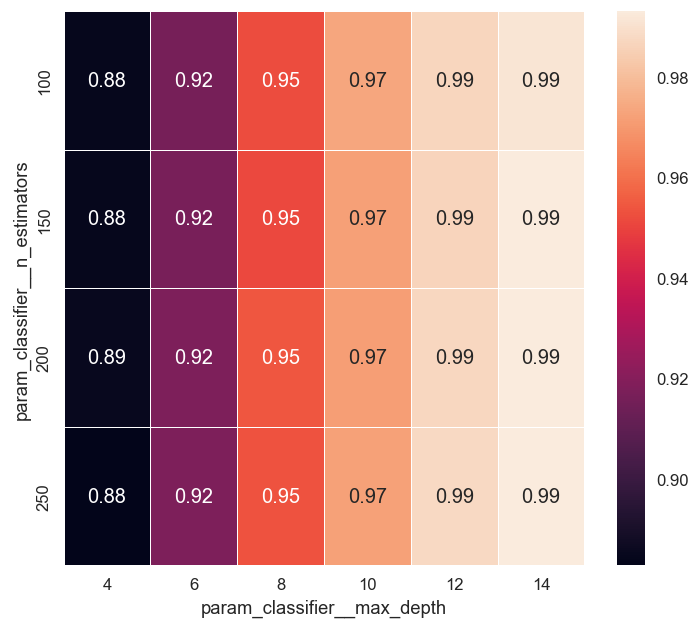

In [47]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__max_depth',values='mean_train_score')
pv_table
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

<AxesSubplot: xlabel='param_classifier__max_depth', ylabel='param_classifier__n_estimators'>

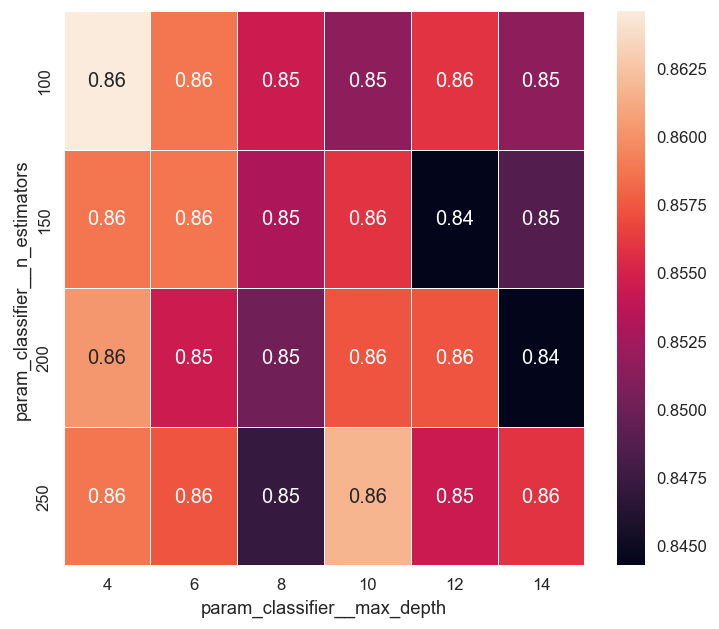

In [48]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__max_depth',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [49]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,0,15,2,4,5,1,3,14,18,7,...,6,19,9,12,20,10,21,11,22,17
mean_fit_time,0.282664,0.8894,0.607846,0.39669,0.471106,0.44641,0.797486,0.754369,0.699558,0.84479,...,0.651146,1.059839,0.529519,0.389888,0.35728,0.723163,0.554525,0.819985,0.675353,0.532119
std_fit_time,0.007447,0.114899,0.040146,0.057711,0.006635,0.030374,0.087195,0.103616,0.028422,0.074315,...,0.050103,0.170709,0.047206,0.05139,0.008037,0.095499,0.06084,0.024941,0.010631,0.007296
mean_score_time,0.027606,0.057613,0.04181,0.036008,0.035808,0.036008,0.052612,0.04621,0.044011,0.053612,...,0.04581,0.051812,0.039409,0.035008,0.029007,0.04481,0.039609,0.051612,0.038409,0.036609
std_score_time,0.00049,0.009812,0.00147,0.006725,0.000748,0.000895,0.005277,0.004263,0.000001,0.004588,...,0.006677,0.002713,0.008311,0.010337,0.001096,0.002228,0.005749,0.002871,0.00196,0.00102
param_classifier,"RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...",...,"RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp..."
param_classifier__max_depth,4,10,4,6,6,4,4,10,12,6,...,6,12,8,10,14,8,14,8,14,12
param_classifier__n_estimators,100,250,200,100,150,150,250,200,200,250,...,200,250,150,100,100,200,150,250,200,150
param_preprocessing,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...",...,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass..."
params,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassifier(bootstra...,{'classifier': RandomForestClassif

### Градиентный бустинг через сетку? Что-то новенькое

In [50]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier())])

n_estimators  = np.arange(100,500,25)
min_samples_leaf = [1,3,5,7,9,11]
# learning_rate = np.arange(0.01,0.2,0.02)
# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [GradientBoostingClassifier()],
     'classifier__n_estimators': n_estimators,
     'classifier__min_samples_leaf': min_samples_leaf
#      'classifier__learning_rate': learning_rate,
#       'classifier__subsample': subsample
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,...
                                                                                                            missing_values=nan,
                                                                                                            strategy='most_frequent',
                                                                                                            verbose='deprecated')),
                                                                                             ('scaler',
                                                                                              OrdinalEncoder(categories='auto',
                                                                                                             dtype=<class 'numpy.float64'>,
                                                                                                             encoded_missing_value=nan,
                                                                                                             handle_unknown='error',
                                                                                                             unknown_value=None))],
                                                                                      verbose=False),
                                                                             ['Sex'])],
                                                              verbose=False,
                                                              verbose_feature_names_out=True)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<AxesSubplot: xlabel='param_classifier__min_samples_leaf', ylabel='param_classifier__n_estimators'>

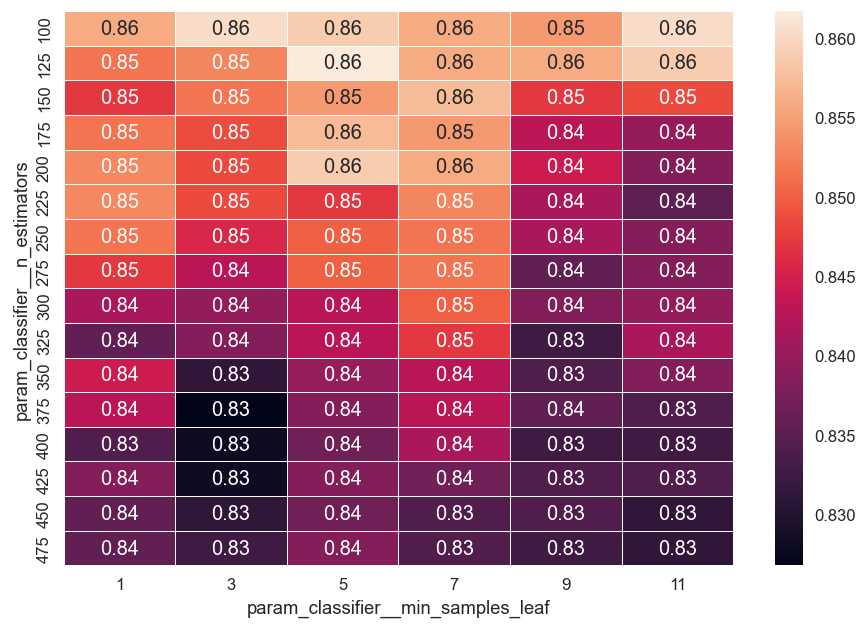

In [51]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__min_samples_leaf',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [52]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier())])

n_estimators  = np.arange(100,200,5)
min_samples_leaf = [1,3,5,7,9,11]
# learning_rate = np.arange(0.01,0.2,0.02)
# subsample= [0.1,0.5,1]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [GradientBoostingClassifier()],
     'classifier__n_estimators': n_estimators,
     'classifier__min_samples_leaf': min_samples_leaf
#      'classifier__learning_rate': learning_rate,
#       'classifier__subsample': subsample
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,...
                                                                                                            missing_values=nan,
                                                                                                            strategy='most_frequent',
                                                                                                            verbose='deprecated')),
                                                                                             ('scaler',
                                                                                              OrdinalEncoder(categories='auto',
                                                                                                             dtype=<class 'numpy.float64'>,
                                                                                                             encoded_missing_value=nan,
                                                                                                             handle_unknown='error',
                                                                                                             unknown_value=None))],
                                                                                      verbose=False),
                                                                             ['Sex'])],
                                                              verbose=False,
                                                              verbose_feature_names_out=True)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<AxesSubplot: xlabel='param_classifier__min_samples_leaf', ylabel='param_classifier__n_estimators'>

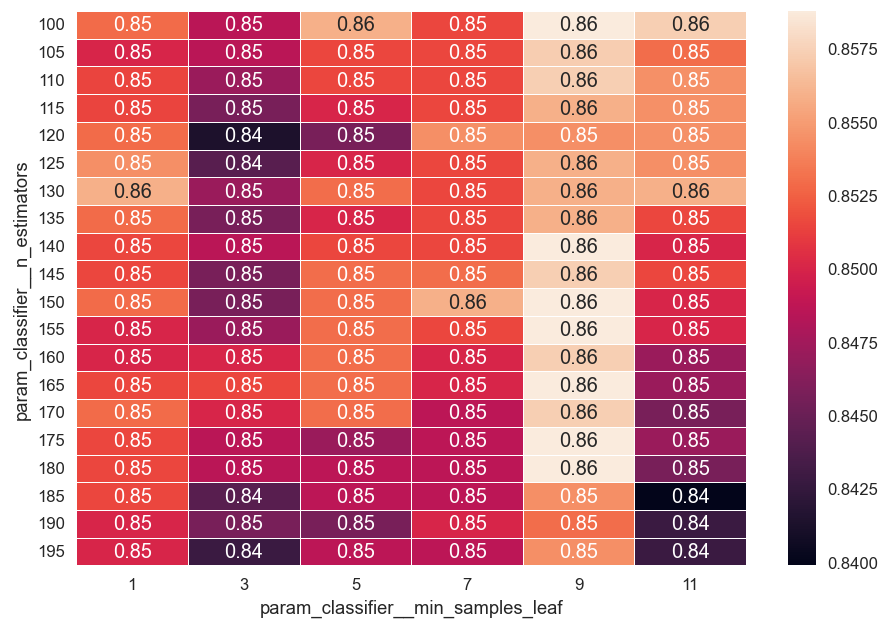

In [53]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__min_samples_leaf',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

### А здесь правильный подход к поиску параметров

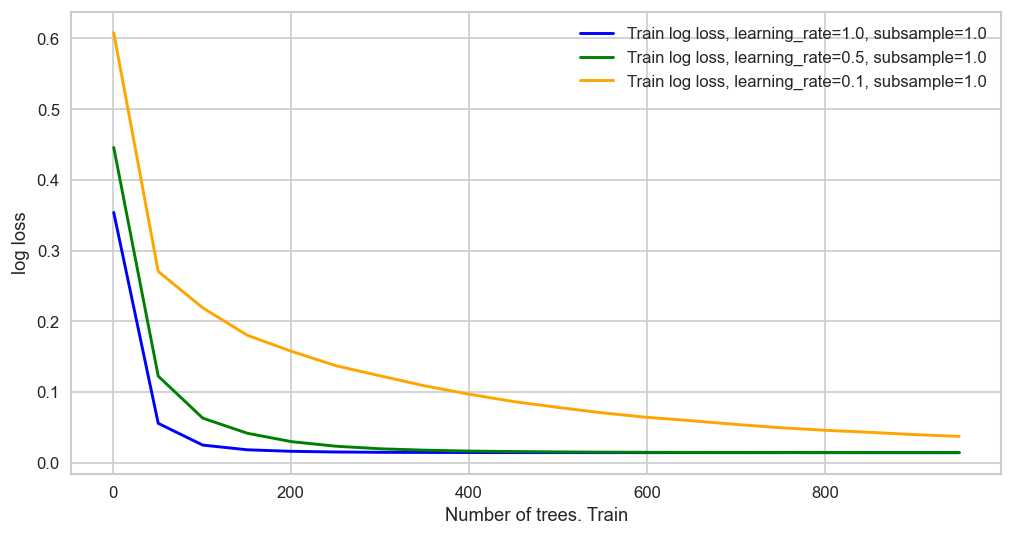

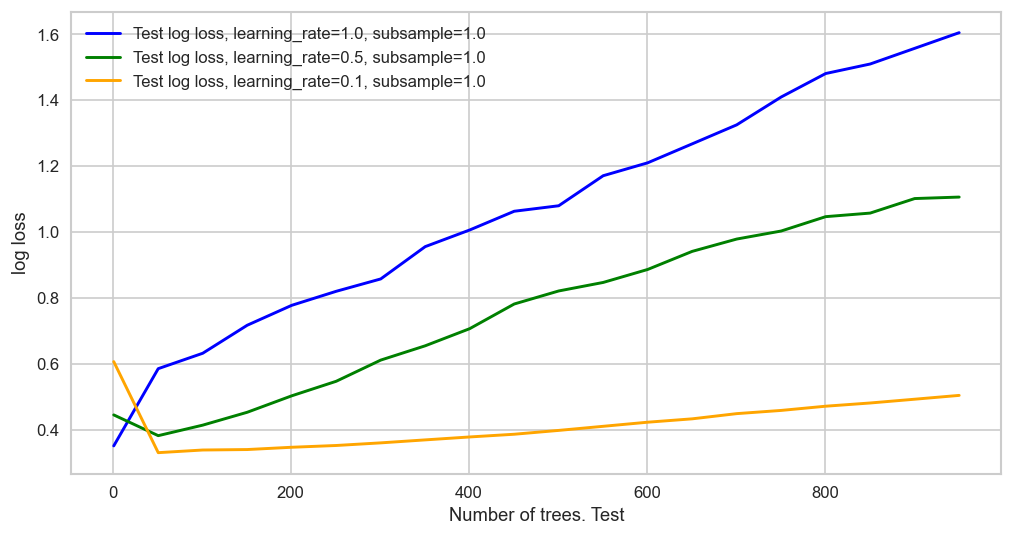

In [54]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import numpy as np

# Задаем параметры моделей
params1 = {'learning_rate': 1.0, 'subsample': 1.0}
params2 = {'learning_rate': 0.5, 'subsample': 1.0}
params3 = {'learning_rate': 0.1, 'subsample': 1.0}

# Инициализируем модели
clf1 = GradientBoostingClassifier(**params1, random_state=42)
clf2 = GradientBoostingClassifier(**params2, random_state=42)
clf3 = GradientBoostingClassifier(**params3, random_state=42)

# Обучаем модели на train данных и сохраняем ошибки на train и test данных
train_errors1, test_errors1 = [], []
train_errors2, test_errors2 = [], []
train_errors3, test_errors3 = [], []
for n in range(1, 1000, 50):
    
    clf1 = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(**params1, random_state=42, n_estimators = n))])
        
    clf2 = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(**params2, random_state=42, n_estimators = n))])
        
    clf3 = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(**params3, random_state=42, n_estimators = n))])
    
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    clf3.fit(X_train, y_train)
    y_train_pred1 = clf1.predict_proba(X_train)
    y_test_pred1 = clf1.predict_proba(X_test)
    y_train_pred2 = clf2.predict_proba(X_train)
    y_test_pred2 = clf2.predict_proba(X_test)
    y_train_pred3 = clf3.predict_proba(X_train)
    y_test_pred3 = clf3.predict_proba(X_test)
    train_errors1.append(log_loss(y_train, y_train_pred1))
    test_errors1.append(log_loss(y_test, y_test_pred1))
    train_errors2.append(log_loss(y_train, y_train_pred2))
    test_errors2.append(log_loss(y_test, y_test_pred2))
    train_errors3.append(log_loss(y_train, y_train_pred3))
    test_errors3.append(log_loss(y_test, y_test_pred3))

# Строим график log loss на train и test данных для каждой модели
plt.figure(figsize=(10,5))
plt.plot(range(1, 1000,50), train_errors1, label='Train log loss, learning_rate=1.0, subsample=1.0', color='blue')
plt.plot(range(1, 1000,50), train_errors2, label='Train log loss, learning_rate=0.5, subsample=1.0', color='green')
plt.plot(range(1, 1000,50), train_errors3, label='Train log loss, learning_rate=0.1, subsample=1.0', color='orange')
plt.xlabel('Number of trees. Train')
plt.ylabel('log loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(range(1, 1000,50), test_errors1, label='Test log loss, learning_rate=1.0, subsample=1.0', color='blue')
plt.plot(range(1, 1000,50), test_errors2, label='Test log loss, learning_rate=0.5, subsample=1.0', color='green')
plt.plot(range(1, 1000,50), test_errors3, label='Test log loss, learning_rate=0.1, subsample=1.0', color='orange')
plt.xlabel('Number of trees. Test')
plt.ylabel('log loss')
plt.legend()
plt.show()

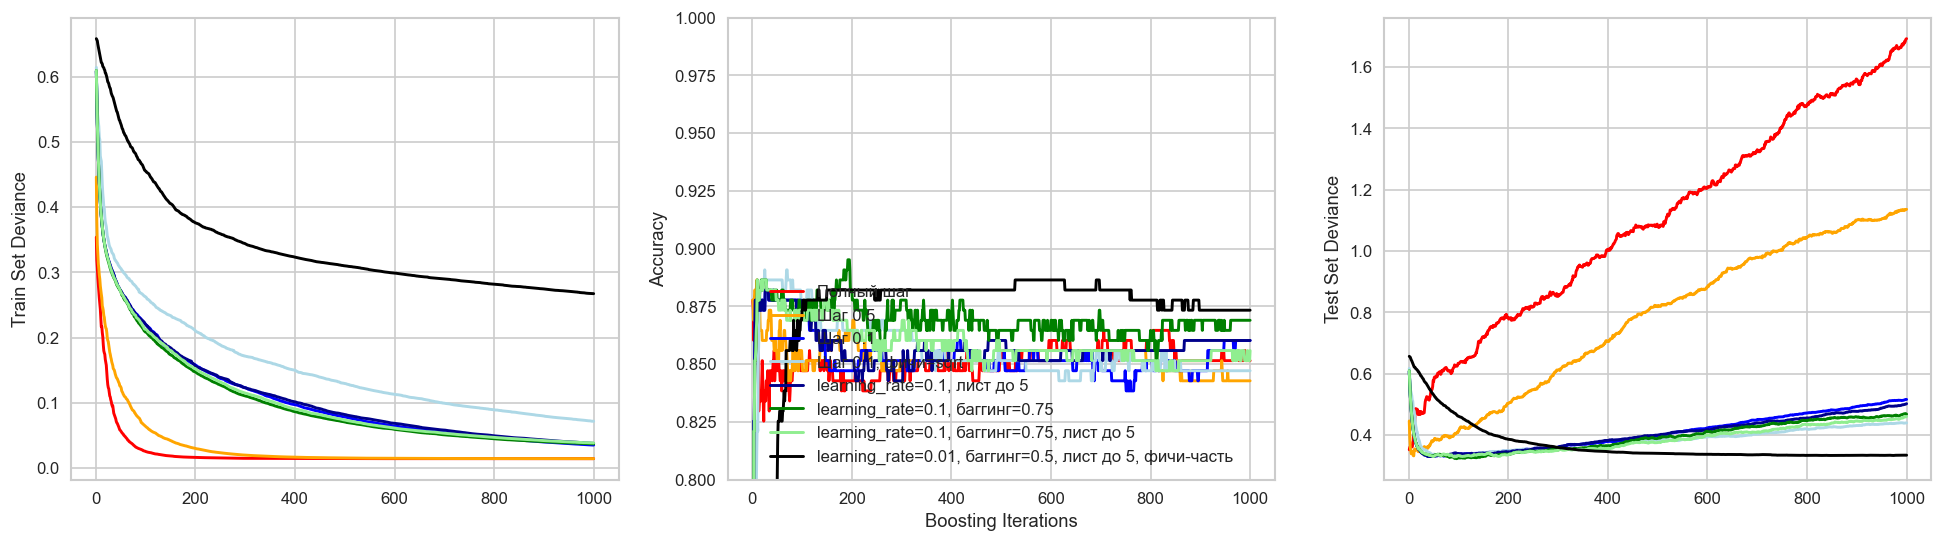

In [55]:
labels, y = np.unique(y, return_inverse=True)
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss

original_params = {
    "n_estimators": 1000,
    #"max_leaf_nodes": None,
    #"max_depth": None,
    "random_state": 42,
    'criterion': 'friedman_mse'
}

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, баггинг=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, баггинг=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, баггинг=0.5, лист до 5, фичи-часть",
             "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    ),
]:
    
    params = dict(original_params)
    params.update(setting)

    clf = Pipeline([('preprocessing', CT),
                ('classifier', GradientBoostingClassifier(**params))])

    clf.fit(X_train, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    
    X_train_for_proba = CT.fit_transform(X_train)
    
    for i, y_pred in enumerate(clf['classifier'].staged_predict_proba(X_train_for_proba)):
        train_deviance[i] = log_loss(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    X_test_for_proba = CT.transform(X_test)
    for i, y_pred in enumerate(clf['classifier'].staged_predict(X_test_for_proba)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_score[i] = accuracy_score(y_test, y_pred)
        
    ax2.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color=color,
        label=label,
    )
    
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    
    for i, y_pred in enumerate(clf['classifier'].staged_predict_proba(X_test_for_proba)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = log_loss(y_test, y_pred)
        
    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

ax2.legend(loc='lower center')
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylim(0.8, 1.)
ax1.set_ylabel("Train Set Deviance")
ax2.set_ylabel("Accuracy")
ax3.set_ylabel("Test Set Deviance")

plt.show()


In [56]:
# Черная линия без фичинга 
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split = 5,
                                                                                max_features = 'sqrt', n_estimators= 900))])
gbc.fit(X_train, y_train)
display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))

0.8951965065502183

0.8777292576419214

In [57]:
# Синяя линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, n_estimators = 100))])
gbc.fit(X_train, y_train)
display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))

0.925764192139738

0.8777292576419214

In [58]:
# Голубая линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, 
                                                                                n_estimators = 170, max_features = 'sqrt'))])
gbc.fit(X_train, y_train)
display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))

0.9184861717612809

0.8733624454148472

### Просмотрим фичи на значимость (это дополнительно)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier())])
gbc.fit(X_train, y_train)
display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))

gbc['classifier'].feature_importances_

0.925764192139738

0.8777292576419214

array([7.37726723e-02, 6.57696169e-02, 1.18096187e-01, 2.63668967e-02,
       1.88135214e-02, 5.21551003e-03, 1.10241581e-03, 4.39340491e-03,
       7.33028692e-06, 9.63639238e-03, 1.09176225e-05, 1.80864198e-03,
       9.63715337e-04, 7.70045503e-03, 0.00000000e+00, 5.13673542e-03,
       1.45384888e-02, 6.46667098e-01])

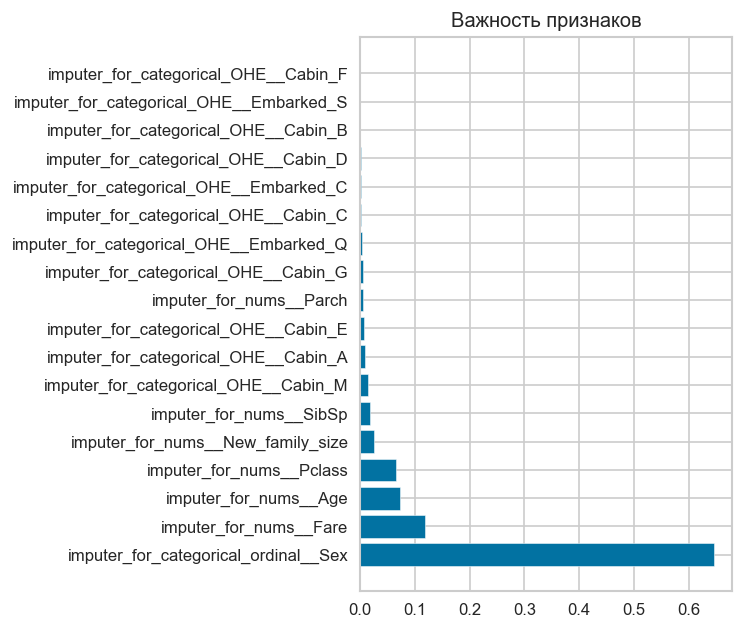

In [60]:
importance = np.sort(gbc['classifier'].feature_importances_)
importance_name = np.argsort(gbc['classifier'].feature_importances_)
feature_names = CT.get_feature_names_out()

plt.figure(figsize=(4, 6))
plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

### Посмотрим логистическкую регрессию

In [61]:
from sklearn.linear_model import LogisticRegression
clf = Pipeline([('preprocessing',CT),('classifier',LogisticRegression()) ]) 

param_grid =[
    {'classifier__penalty': ['l2'], 'classifier__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga'], 'classifier__C': [0.001, 0.01, 0.1, 1, 2, 5, 10]},
    {'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga'], 'classifier__C': [0.001, 0.01, 0.1, 1, 2, 5, 10]},
    {'classifier__penalty': ['elasticnet'], 'classifier__solver': ['lbfgs','newton-cg'], 'classifier__C': [0.001, 0.01, 0.1, 1, 10]}]

grid = GridSearchCV(clf, param_grid, return_train_score=True)

grid.fit(X_train, y_train)
clf_reg = grid.best_estimator_
clf_reg.fit(X_train,y_train)
print(grid.best_params_)
print(clf_reg.score(X_train,y_train))
print(clf_reg.score(X_test,y_test))

{'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
0.8544395924308588
0.8471615720524017


### Посмотрим RidgeClassifier

In [62]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', RidgeClassifier())])

solver = ['auto','lbfgs','svd']
alpha = np.arange(0.01,3,0.1)


param_grid = [
    {'preprocessing': [CT],
    'classifier': [RidgeClassifier()],
     'classifier__solver': solver,
     'classifier__alpha': alpha
#      'classifier__learning_rate': learning_rate,
#       'classifier__subsample': subsample
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,...
                                                                                                            missing_values=nan,
                                                                                                            strategy='most_frequent',
                                                                                                            verbose='deprecated')),
                                                                                             ('scaler',
                                                                                              OrdinalEncoder(categories='auto',
                                                                                                             dtype=<class 'numpy.float64'>,
                                                                                                             encoded_missing_value=nan,
                                                                                                             handle_unknown='error',
                                                                                                             unknown_value=None))],
                                                                                      verbose=False),
                                                                             ['Sex'])],
                                                              verbose=False,
                                                              verbose_feature_names_out=True)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<AxesSubplot: xlabel='param_classifier__alpha', ylabel='param_classifier__solver'>

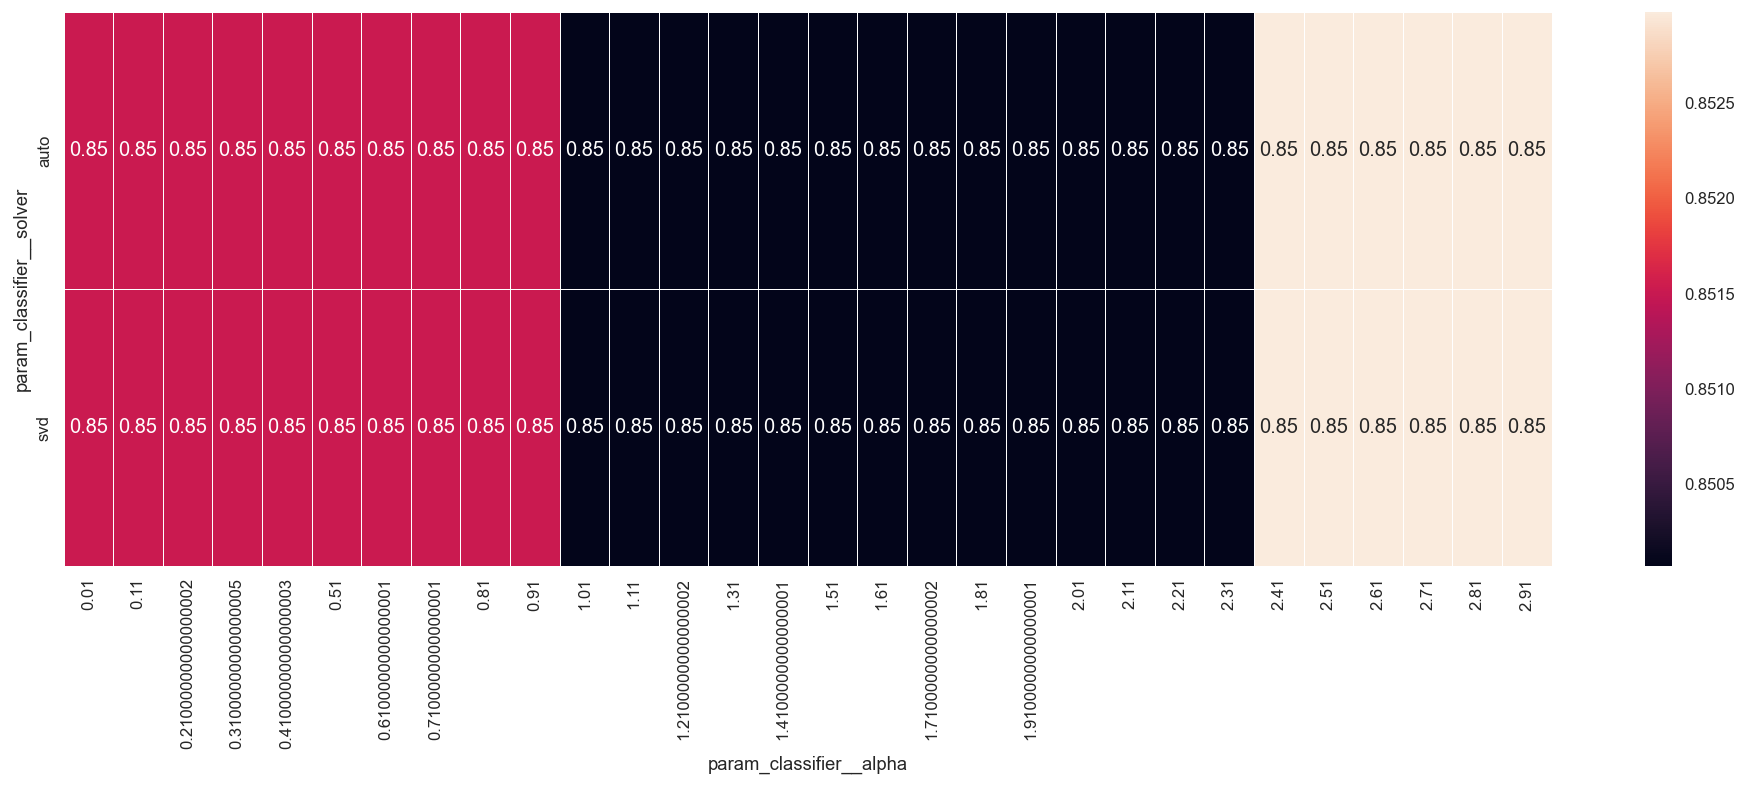

In [63]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__solver',columns='param_classifier__alpha',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [64]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,89,72,74,77,78,80,75,83,84,86,...,40,58,55,19,43,52,88,49,73,34
mean_fit_time,0.025406,0.030607,0.047011,0.030208,0.032007,0.035808,0.061214,0.037208,0.036008,0.029607,...,0.027806,0.029807,0.028807,0.029006,0.049211,0.034207,0.030807,0.030407,0.051612,0.028607
std_fit_time,0.002333,0.00432,0.026159,0.002482,0.004051,0.002227,0.061393,0.002638,0.005658,0.001357,...,0.001601,0.004665,0.002639,0.004981,0.035989,0.006525,0.002715,0.003721,0.042419,0.006801
mean_score_time,0.008002,0.015603,0.024605,0.014203,0.015405,0.016603,0.028207,0.017405,0.016604,0.023806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.00155,0.003262,0.019719,0.001471,0.001626,0.000801,0.029164,0.001497,0.002871,0.018152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_classifier,"RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...",...,"RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,...","RidgeClassifier(alpha=2.41, class_weight=None,..."
param_classifier__alpha,2.91,2.41,2.41,2.51,2.61,2.61,2.51,2.71,2.81,2.81,...,1.31,1.91,1.81,0.61,1.41,1.71,2.91,1.61,2.41,1.11
param_classifier__solver,svd,auto,svd,svd,auto,svd,auto,svd,auto,svd,...,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs,lbfgs
param_preprocessing,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...",...,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass..."
params,"{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...",...,"{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier': RidgeClassifier(alpha=2.41, cla...","{'classifier'

In [68]:
ridge = Pipeline([('preprocessing', CT),('classifier', RidgeClassifier(solver='auto', alpha = 2))])
ridge.fit(X_train, y_train)
display(ridge.score(X_train, y_train))
display(ridge.score(X_test, y_test))

0.858806404657933

0.8427947598253275

### Проверяем модель LinearDiscriminantAnalysis

In [66]:
lda = Pipeline([('preprocessing', CT),('classifier', LinearDiscriminantAnalysis(solver='svd'))])
lda.fit(X_train, y_train)
display(lda.score(X_train, y_train))
display(lda.score(X_test, y_test))

0.8558951965065502

0.834061135371179

In [67]:
lda = Pipeline([('preprocessing', CT),('classifier', LinearDiscriminantAnalysis(solver='lsqr'))])
lda.fit(X_train, y_train)
display(lda.score(X_train, y_train))
display(lda.score(X_test, y_test))

0.858806404657933

0.8296943231441049

### Проверяем DecisionTreeClassifier

In [68]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
pipe = Pipeline([('preprocessing', CT),
                ('classifier', DecisionTreeClassifier())])

criterion = ['gini','entropy']
min_samples_leaf = np.arange(1,5,1)
max_features = np.arange(0.01,1,0.1)
max_depth = [1,3,5,7]

param_grid = [
    {'preprocessing': [CT],
    'classifier': [DecisionTreeClassifier()],
     'classifier__criterion': criterion,
     'classifier__min_samples_leaf': min_samples_leaf,
     'classifier__max_features': max_features,
      'classifier__max_depth': max_depth
#      'classifier__n_jobs': [-1] # задействовать все процессы
    }
] #решетка

# cross_val = StratifiedShuffleSplit(n_splits=3)
cross_val = StratifiedKFold(n_splits=5, shuffle=True)

grid = GridSearchCV(pipe,param_grid, cv=cross_val,
                    return_train_score = True,
                   n_jobs = -1) # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('imputer_for_nums',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,...
                                                                                                            missing_values=nan,
                                                                                                            strategy='most_frequent',
                                                                                                            verbose='deprecated')),
                                                                                             ('scaler',
                                                                                              OrdinalEncoder(categories='auto',
                                                                                                             dtype=<class 'numpy.float64'>,
                                                                                                             encoded_missing_value=nan,
                                                                                                             handle_unknown='error',
                                                                                                             unknown_value=None))],
                                                                                      verbose=False),
                                                                             ['Sex'])],
                                                              verbose=False,
                                                              verbose_feature_names_out=True)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

<AxesSubplot: xlabel='param_classifier__min_samples_leaf', ylabel='param_classifier__criterion'>

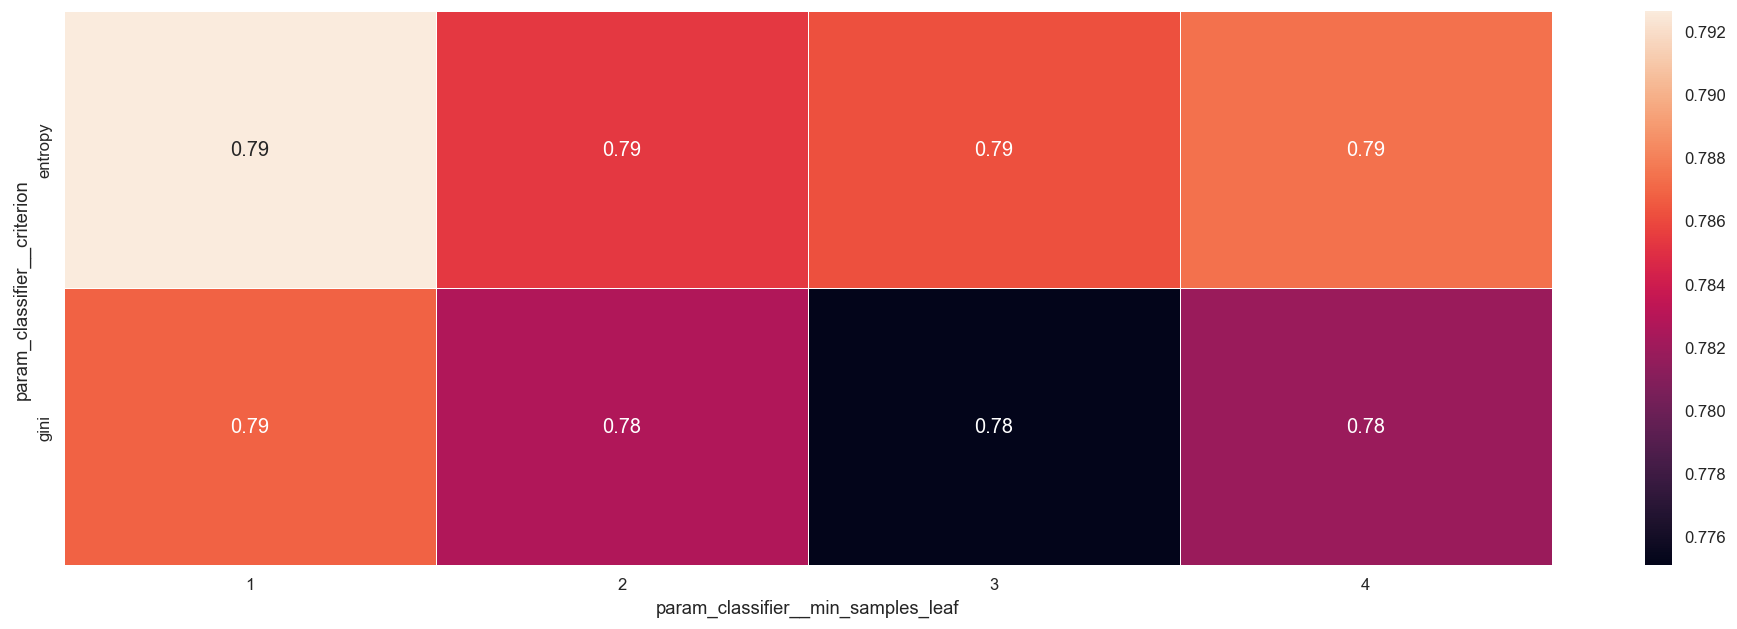

In [69]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__criterion',columns='param_classifier__min_samples_leaf',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

<AxesSubplot: xlabel='param_classifier__min_samples_leaf', ylabel='param_classifier__max_depth'>

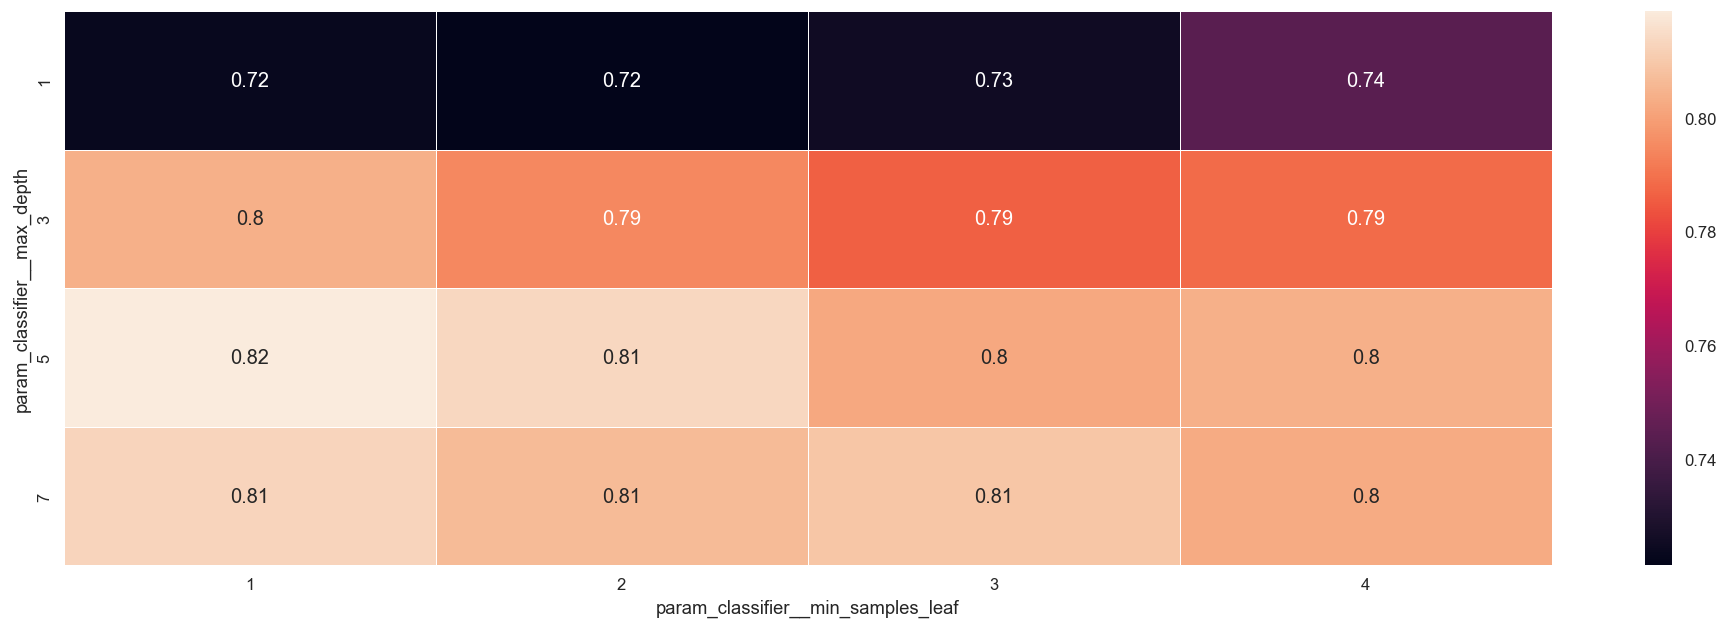

In [70]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_classifier__max_depth',columns='param_classifier__min_samples_leaf',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [71]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

,264,221,112,262,60,271,235,314,220,222,...,163,7,2,164,5,6,160,169,170,161
mean_fit_time,0.030207,0.030007,0.031608,0.028407,0.028207,0.033608,0.036409,0.033807,0.029207,0.034408,...,0.030007,0.029007,0.022805,0.031207,0.028207,0.031407,0.028006,0.029207,0.030007,0.032807
std_fit_time,0.002136,0.00514,0.0008,0.00393,0.003817,0.002577,0.006153,0.001722,0.003189,0.011167,...,0.004427,0.00405,0.0016,0.00343,0.002136,0.002577,0.002449,0.002228,0.000895,0.011739
mean_score_time,0.015003,0.017004,0.016205,0.013403,0.012402,0.015203,0.017804,0.015803,0.014403,0.013403,...,0.014203,0.014404,0.009002,0.013803,0.016004,0.014203,0.014204,0.015803,0.014403,0.014003
std_score_time,0.000633,0.008416,0.002042,0.002418,0.002653,0.00147,0.003488,0.0004,0.000801,0.001856,...,0.001166,0.0008,0.000895,0.001601,0.001898,0.001601,0.001166,0.003311,0.0008,0.001095
param_classifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...",...,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we...","DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
param_classifier__criterion,entropy,entropy,gini,entropy,gini,entropy,entropy,entropy,entropy,entropy,...,entropy,gini,gini,entropy,gini,gini,entropy,entropy,entropy,entropy
param_classifier__max_depth,5,3,5,5,3,5,3,7,3,3,...,1,1,1,1,1,1,1,1,1,1
param_classifier__max_features,0.61,0.51,0.81,0.51,0.51,0.71,0.81,0.81,0.51,0.51,...,0.01,0.11,0.01,0.11,0.11,0.11,0.01,0.21,0.21,0.01
param_classifier__min_samples_leaf,1,2,1,3,1,4,4,3,1,3,...,4,4,3,1,2,3,1,2,3,2
param_preprocessing,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...",...,"ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass...","ColumnTransformer(n_jobs=None, remainder='pass..."


Accuracy: 0.86 (+/- 0.03) [Gradient Boosting]
Accuracy: 0.86 (+/- 0.02) [Logistic Regression]
Accuracy: 0.86 (+/- 0.02) [Random Forest]
Accuracy: 0.86 (+/- 0.02) [Ensemble]


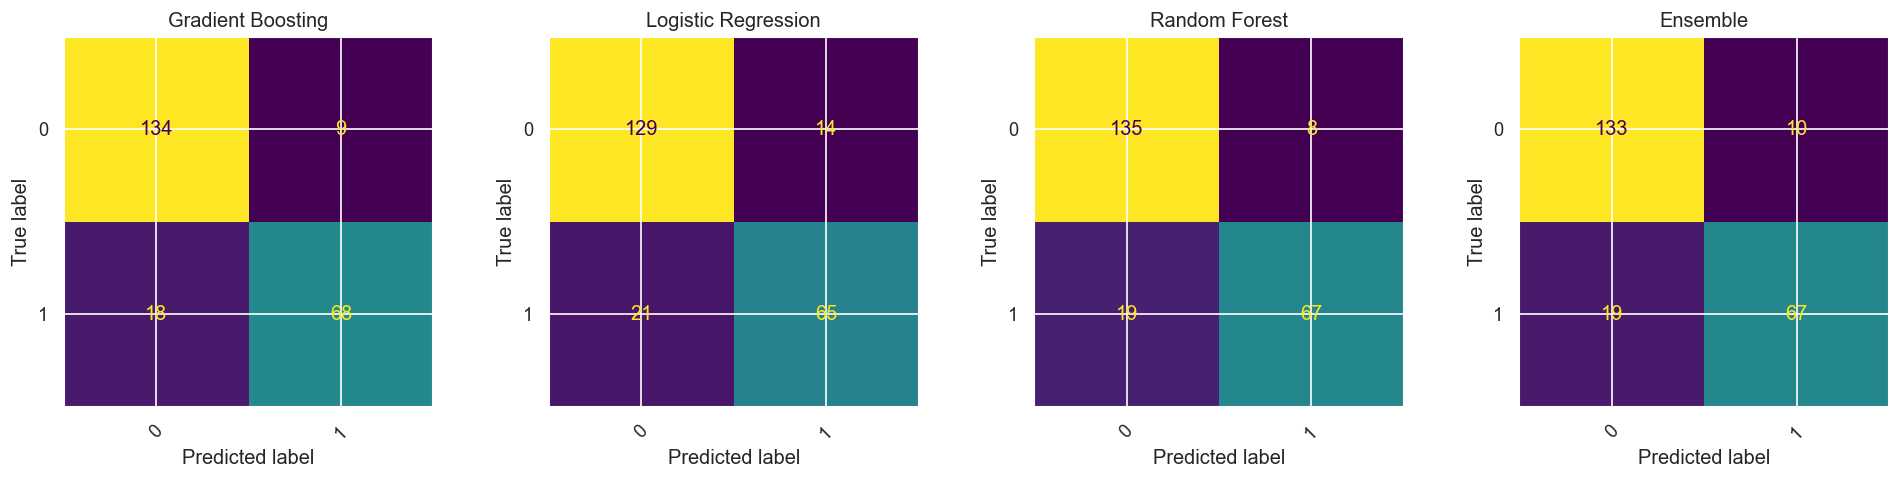

In [27]:
from sklearn.ensemble import VotingClassifier


# clf1 = Pipeline([('preprocessing', CT),
#                  ('classifier',  KNeighborsClassifier(n_neighbors = 41 , p = 5))])

clf1 = Pipeline([('preprocessing', CT),
                 ('classifier', GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split = 5,
                                                                                max_features = 'sqrt', n_estimators= 900))])
clf2 = Pipeline([('preprocessing', CT),
                 ('classifier', LogisticRegression(C=2, penalty = 'l1', solver= 'saga')) ]) 

clf3 = Pipeline([('preprocessing', CT),
                ('classifier', RandomForestClassifier(n_estimators=200,max_features='sqrt', min_samples_leaf = 4))]) 

# clf1 = LogisticRegression(random_state=1)
# clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
# clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('gb', clf1), ('lr', clf2), ('rf', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Gradient Boosting', 'Logistic Regression', 
                                                 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

f, axes = plt.subplots(1, 4, figsize=(20, 4))
for i,(clf, label) in enumerate(zip([clf1, clf2, clf3, eclf], ['Gradient Boosting', 'Logistic Regression', 
                                                 'Random Forest', 'Ensemble'])):
    y_pred = clf.fit(X_train,y_train).predict(X_test) 
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=['0','1'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(label)
    disp.im_.colorbar.remove()

### Вот так это фититься

In [28]:
c1 = GradientBoostingClassifier(learning_rate=0.01, subsample=0.5, min_samples_split = 5,
                                                                                max_features = 'sqrt', n_estimators= 900)
c2 = LogisticRegression(C=2, penalty = 'l1', solver= 'saga')

c3 = RandomForestClassifier(n_estimators=200,max_features='sqrt', min_samples_leaf = 4)


pipe_hard = Pipeline([('preprocessing', CT),('classifier', 
                                      VotingClassifier(estimators=[('gb', c1), ('lr', c2), ('rf', c3)], 
                                                       voting='hard'))])
pipe_hard.fit(X_train, y_train)
display(pipe_hard.score(X_train, y_train))
display(pipe_hard.score(X_test, y_test))

0.8820960698689956

0.8820960698689956

## Проверим на precision с матрицами

In [35]:
# Голубая линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, 
                                                                                n_estimators = 170, max_features = 'sqrt'))])
gbc.fit(X_train, y_train)

y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)


display(gbc.score(X_train, y_train))
display(gbc.score(X_test, y_test))


print(precision_score(y_train,y_pred_train))
print(precision_score(y_test,y_pred_test))

0.9213973799126638

0.868995633187773

0.905511811023622
0.85


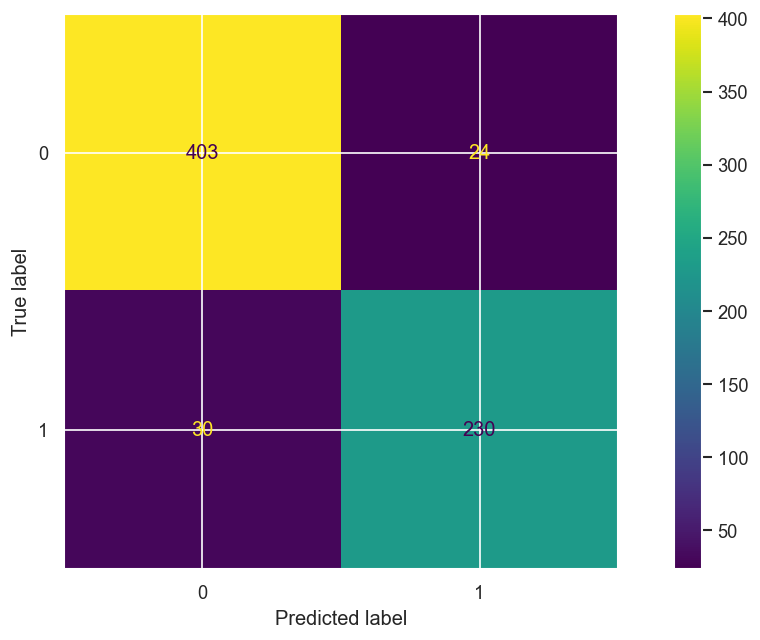

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred_train)).plot();

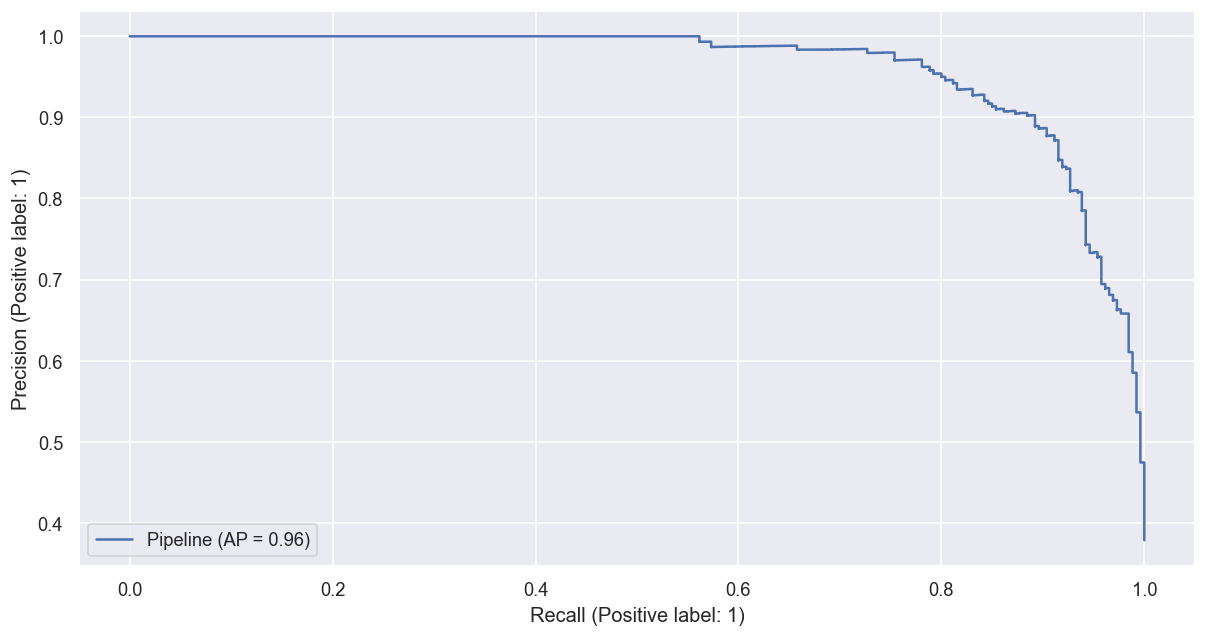

In [37]:
PrecisionRecallDisplay.from_estimator(gbc, X_train, y_train);

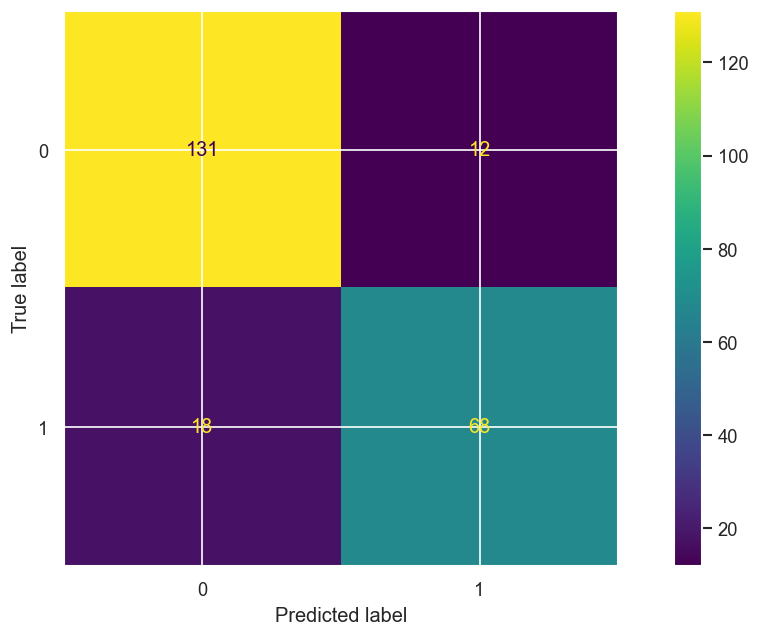

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test)).plot();

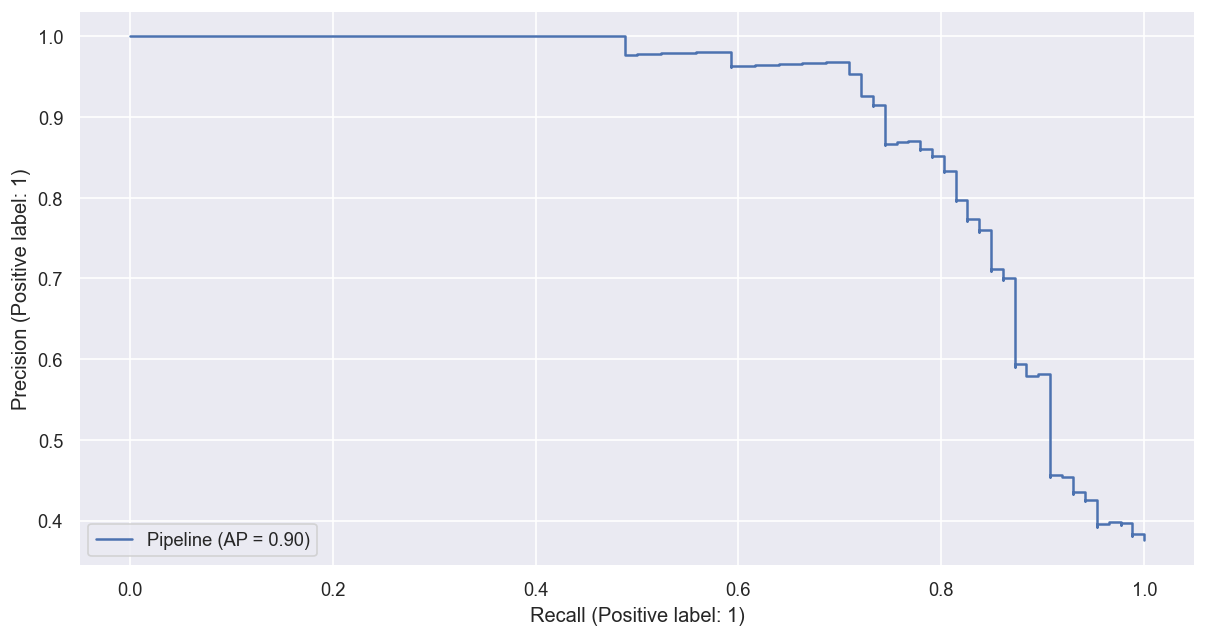

In [39]:
PrecisionRecallDisplay.from_estimator(gbc, X_test, y_test);

In [48]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       427
           1       0.91      0.88      0.89       260

    accuracy                           0.92       687
   macro avg       0.92      0.91      0.92       687
weighted avg       0.92      0.92      0.92       687



## Сделаем для тестового файла. Файл fin_model.ipynb 

In [74]:
df2 = pd.read_csv('test.csv')
df2.describe()

,Pclass,Age,SibSp,Parch,Fare
count,393.000000,308.000000,393.000000,393.000000,392.000000
mean,2.310433,30.431299,0.475827,0.358779,34.866868
std,0.827042,13.875563,1.042491,0.759988,62.228041
min,1.000000,0.330000,0.000000,0.000000,0.000000
25%,2.000000,21.750000,0.000000,0.000000,7.925000
50%,3.000000,29.000000,0.000000,0.000000,13.775000
75%,3.000000,39.000000,1.000000,0.000000,30.017700
max,3.000000,76.000000,8.000000,5.000000,512.329200


In [75]:
df2

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
1,3,"Foley, Mr. Joseph",male,26.00,0,0,330910,7.8792,NaN,Q
2,1,"Molson, Mr. Harry Markland",male,55.00,0,0,113787,30.5000,C30,S
3,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q
4,3,"Saundercock, Mr. William Henry",male,20.00,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
388,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
389,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.00,0,1,111361,57.9792,B18,C
390,3,"Hansen, Mr. Henry Damsgaard",male,21.00,0,0,350029,7.8542,NaN,S
391,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S


In [76]:
df2['Cabin'] = df2['Cabin'].fillna('Missing')
df2['Cabin'] = [col.strip()[0] for col in df2['Cabin']]
df2['Cabin'].unique()

array(['C', 'M', 'E', 'A', 'D', 'B', 'F', 'G', 'T'], dtype=object)

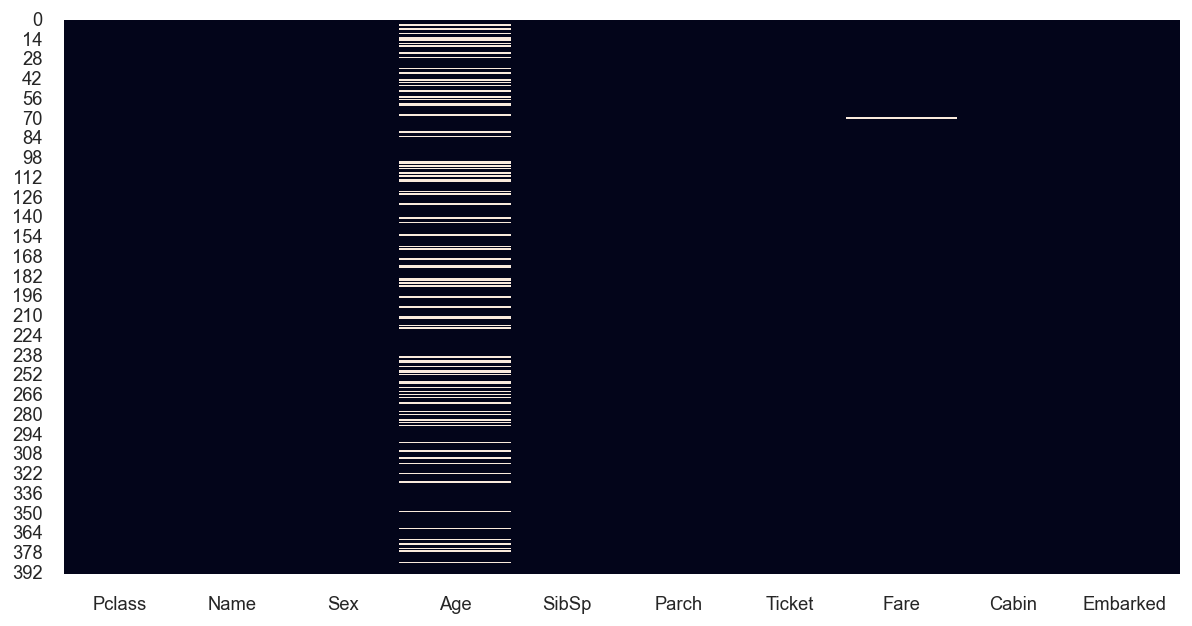

In [77]:
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 6)})
sns.heatmap(df2.isnull(), cbar=False)
plt.show()

In [78]:
fare_mean = df2['Fare'].mean()

# заменить все пропущенные значения в колонке Fare средним значением
df2['Fare'].fillna(fare_mean, inplace=True)

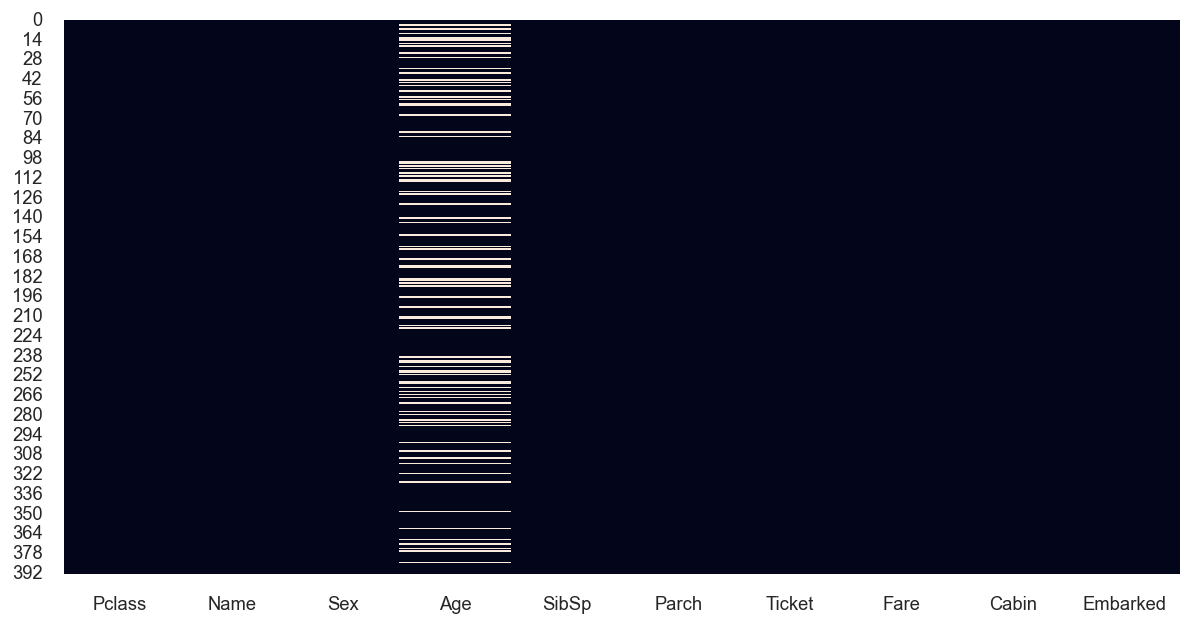

In [79]:
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 6)})
sns.heatmap(df2.isnull(), cbar=False)
plt.show()

In [80]:
df2["New_family_size"] = df2["SibSp"] + df2["Parch"] + 1

In [81]:
df2 = df2.drop(['Name','Ticket'],axis=1)

In [82]:
df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_family_size
0,1,female,58.00,0,1,153.4625,C,S,2
1,3,male,26.00,0,0,7.8792,M,Q,1
2,1,male,55.00,0,0,30.5000,C,S,1
3,3,female,NaN,0,0,7.8792,M,Q,1
4,3,male,20.00,0,0,8.0500,M,S,1
...,...,...,...,...,...,...,...,...,...
388,3,male,0.42,0,1,8.5167,M,C,2
389,1,female,44.00,0,1,57.9792,B,C,2
390,3,male,21.00,0,0,7.8542,M,S,1
391,3,male,74.00,0,0,7.7750,M,S,1


In [83]:
axis_features = ['Age','Pclass', 'Fare','New_family_size','SibSp','Parch'] # сюда вписываются числовые колонки
categorical_features = ['Embarked', 'Cabin'] # сюда вписываются категориальные колонки для OneHotEncoder
categorical_ordinal = ['Sex'] # сюда вписываются категориальные в перевод в числа без приориотизации (например, бинарные 0 1)
# categorical_with_order = [] # сюда вписываются категориальная колонка для перевода в числа с приоритизацией порядка (от 0 до N)

# здесь идет преобразование числовых
imputer_for_nums = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors = 5, missing_values=np.nan)),
    ('scaler', MinMaxScaler())
])

imputer_for_categorical_OHE = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('scaler', OneHotEncoder(handle_unknown='ignore'))
    
])

imputer_for_categorical_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder())
    
])

order_for_cat = [{
    'col':'НАЗВАНИЕ КОЛОНКИ',
    'mapping':{'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
    }]

imputer_for_categorical_with_order = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=order_for_cat)),
    ('scaler', MinMaxScaler())
    ])



CT = ColumnTransformer([
    
        ("imputer_for_nums", imputer_for_nums, axis_features), # здесь идет преобразование числовых
        ("imputer_for_categorical_OHE", imputer_for_categorical_OHE, categorical_features), ## здесь onehotencoder (страны, города и тд)
        ("imputer_for_categorical_ordinal", imputer_for_categorical_ordinal, categorical_ordinal), # преобразование категорий в бинарные 0 1
#         ("imputer_for_categorical_with_order", imputer_for_categorical_with_order, categorical_with_order) # преобразование категорий в приоритизированный массив от 0 до N

             ], 
    
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('imputer_for_nums',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  KNNImputer(add_indicator=False,
                                                             copy=True,
                                                             keep_empty_features=False,
                                                             metric='nan_euclidean',
                                                             missing_values=nan,
                                                             n_neighbors=5,
                                                             weights='uniform')),
                                                 ('scaler',
                                                  MinMaxScaler(clip=False,...
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                keep_empty_features=False,
                                                                missing_values=nan,
                                                                strategy='most_frequent',
                                                                verbose='deprecated')),
                                                 ('scaler',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>,
                                                                 encoded_missing_value=nan,
                                                                 handle_unknown='error',
                                                                 unknown_value=None))],
                                          verbose=False),
                                 ['Sex'])],
                  verbose=False, verbose_feature_names_out=True)

In [84]:
# Голубая линия без фичинга
from sklearn.ensemble import GradientBoostingClassifier
gbc = Pipeline([('preprocessing', CT),('classifier', GradientBoostingClassifier(learning_rate = 0.1, subsample = 1, 
                                                                                n_estimators = 170, max_features = 'sqrt'))])
gbc.fit(X, y)

gbc.predict(df2)


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,